# Estudio de Neuronas Individuales del CPG de Lymnaea stagnalis

Este notebook reproduce el análisis de la **Figura 3** del paper *Vavoulis et al. (2007)*: 
> "Dynamic control of a central pattern generator circuit: A computational model of the snail feeding network"

## Objetivo

Caracterizar el comportamiento intrínseco de cada tipo neuronal del circuito de alimentación:
- **N1M**: Interneurona de la fase de protracción (corriente de ACh)
- **N2v**: Interneurona de la fase de rasp (corriente de NaL lenta)
- **N3t**: Interneurona de la fase de swallow (corriente T de bajo umbral)
- **SO**: Neurona moduladora (pasiva, sin corrientes intrínsecas)

## Modelo Matemático

El modelo de Vavoulis (2007) utiliza **dos compartimentos** acoplados eléctricamente:

### Compartimento Somático
$$C_m \frac{dV_S}{dt} = -i_{L,S} - i_X - i_{ec,S} + I_{syn}$$

Donde $i_X$ depende del tipo neuronal (ver Tabla 1 del paper).

### Compartimento Axonal  
$$C_m \frac{dV_A}{dt} = -i_{L,A} - i_{NaT} - i_K - i_{ec,A}$$

Con dinámicas tipo Hodgkin-Huxley para las corrientes rápidas.

## Condiciones Iniciales y Variables de Compuerta

Para iniciar las simulaciones en un estado de **reposo fisiológico**, usamos valores derivados del **estado de equilibrio** a $V = -67$ mV (potencial de reposo). Todas las variables de compuerta se calculan con las **expresiones exactas** de las funciones sigmoideas evaluadas en el potencial de reposo.

### Potencial de Reposo

El potencial de reposo viene dado por la corriente de fuga:
$$i_L = V_S + 67$$

Cuando $V_S = -67$ mV, la corriente de fuga es cero, definiendo el **potencial de equilibrio** $E_{leak} = -67$ mV.

### Variables de Activación vs Inactivación

Cada variable de compuerta evoluciona según:
$$\frac{dx}{dt} = \frac{x_\infty(V) - x}{\tau_x}$$

Donde $x_\infty(V)$ es el valor de equilibrio al voltaje $V$.

| Tipo de variable | Significado físico | Tendencia en reposo |
|------------------|-------------------|---------------------|
| **Activación** ($p$, $n$) | Canal **cerrado** | Valores bajos ($< 0.3$) |
| **Inactivación** ($q$, $h$) | Canal **disponible** (no inactivado) | Valores altos ($> 0.8$) |

### Compartimento Somático: Variables $p$ y $q$ (específicas de cada neurona)

Las variables $p$ y $q$ dependen de la corriente intrínseca de cada tipo neuronal:

#### Variable $p$ (activación somática):

**N1M** ($i_{ACh}$):
$$p_\infty = \frac{1}{1 + e^{(-38.8 - V_S)/10}} = \frac{1}{1 + e^{2.82}} = 0.0559$$

**N2v** ($i_{NaL}$):
$$p_\infty = \frac{1}{1 + e^{(-51 - V_S)/10.3}} = \frac{1}{1 + e^{1.553}} = 0.1747$$

**N3t** ($i_T$):
$$p_\infty = \frac{1}{1 + e^{(-61.6 - V_S)/5.6}} = \frac{1}{1 + e^{0.964}} = 0.2764$$

**SO**: No tiene corriente intrínseca, $p$ no se usa (se inicializa a 0)

#### Variable $q$ (inactivación lenta somática):

**N2v** ($i_{NaL}$):
$$q_\infty = \frac{1}{1 + e^{(-45 - V_S)/(-3)}} = \frac{1}{1 + e^{-7.333}} = 0.9993$$

**N3t** ($i_T$):
$$q_\infty = \frac{1}{1 + e^{(-73.2 - V_S)/(-5.1)}} = \frac{1}{1 + e^{-1.216}} = 0.2289$$

**N1M y SO**: No usan $q$ (se inicializa a 0)

### Compartimento Axonal: Variables $h$ y $n$ (comunes a todas las neuronas)

El compartimento axonal es **idéntico** para las cuatro neuronas (Tabla 3, Vavoulis 2007). Contiene las corrientes de generación de potenciales de acción ($i_{NaT}$, $i_K$) con las mismas ecuaciones y parámetros. La **única excepción** es el acoplamiento electrotónico de N2v: $i_{ec,A} = 0.06 \cdot (V_A - V_S)$ en vez de $8 \cdot (V_A - V_S)$.

Por tanto, $h$ y $n$ se inicializan con los **mismos valores exactos** para las cuatro neuronas:

#### Variable $h$ (inactivación Na rápido):
$$h_\infty = \frac{1}{1 + e^{(-55.2 - V_A)/(-7.1)}} = \frac{1}{1 + e^{-1.662}} = 0.8405$$

En el código: `1/(1+exp((-55.2-(-67.0))/-7.1))`

#### Variable $n$ (activación K retardado):
$$n_\infty = \frac{1}{1 + e^{(-30 - V_A)/17.4}} = \frac{1}{1 + e^{2.126}} = 0.1066$$

En el código: `1.0/(1.0+exp((-30.0-(-67.0))/17.4))`

### Tabla de Condiciones Iniciales Exactas por Neurona

| Variable | N1M | N2v | N3t | SO | Expresión en código |
|----------|-----|-----|-----|-----|---------------------|
| $V_S$ (mV) | -67.0 | -67.0 | -67.0 | -67.0 | `-67` |
| $V_A$ (mV) | -67.0 | -67.0 | -67.0 | -67.0 | `-67` |
| $p$ | **0.0559** | **0.1747** | **0.2764** | 0.0 | Sigmoidea específica |
| $q$ | 0.0 | **0.9993** | **0.2289** | 0.0 | Sigmoidea específica |
| $h$ | **0.8405** | **0.8405** | **0.8405** | **0.8405** | Común a todas |
| $n$ | **0.1066** | **0.1066** | **0.1066** | **0.1066** | Común a todas |

### Notas

1. **Variables somáticas ($p$, $q$)**: Dependen del tipo de corriente intrínseca de cada neurona. Se calculan con las expresiones exactas $x_\infty(-67)$.

2. **Variables axonales ($h$, $n$)**: Son **comunes a las cuatro neuronas** porque el compartimento axonal tiene la misma estructura (Tabla 3 del paper). Se calculan con las mismas expresiones exactas de equilibrio.

3. **Corrientes intrínsecas somáticas**:
   - **N1M**: Solo usa $p$ en $i_{ACh} = 200 \cdot p^3 \cdot (V + 30)$
   - **N2v**: Usa $p$ y $q$ en $i_{NaL} = 2 \cdot p^3 \cdot q \cdot (V - 55)$
   - **N3t**: Usa $p$ y $q$ en $i_T = 3.27 \cdot p^3 \cdot q \cdot (V - 80)$
   - **SO**: Neurona pasiva, sin corrientes intrínsecas ($i_X = 0$)

In [1]:
# Imports y configuracion
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import os

# Configuracion de matplotlib para figuras de calidad
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'legend.fontsize': 10,
    'lines.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Directorios base (donde estan los ejecutables compilados)
BUILD_DIR = "/home/jhayav/Escritorio/4carrera/Neun-Example-J/build"
BUILD_DIR_NEURONAS = os.path.join(BUILD_DIR, "neuronas")
BUILD_DIR_CIRCUITOS = os.path.join(BUILD_DIR, "circuitos")
print(f"Directorio de build: {BUILD_DIR}")
print(f"Directorio de neuronas: {BUILD_DIR_NEURONAS}")
print(f"Directorio de circuitos: {BUILD_DIR_CIRCUITOS}")

Directorio de build: /home/jhayav/Escritorio/4carrera/Neun-Example-J/build
Directorio de neuronas: /home/jhayav/Escritorio/4carrera/Neun-Example-J/build/neuronas
Directorio de circuitos: /home/jhayav/Escritorio/4carrera/Neun-Example-J/build/circuitos


In [2]:
def compilar_proyecto():
    """Compila el proyecto con make para asegurar que los ejecutables estan actualizados."""
    print("Compilando proyecto...")
    result = subprocess.run(
        ["make", "-j4"],
        cwd=BUILD_DIR,
        capture_output=True,
        text=True
    )
    if result.returncode != 0:
        print(f"Error de compilacion:\n{result.stderr}")
        return False
    print("Compilacion exitosa.")
    return True

def ejecutar_simulacion(ejecutable, tipo="neuronas"):
    """
    Ejecuta una simulacion y devuelve los datos como arrays de numpy.
    
    Args:
        ejecutable: Nombre del ejecutable (sin ruta)
        tipo: "neuronas" o "circuitos" para seleccionar el directorio correcto
    
    Returns:
        dict con las columnas de datos o None si hay error
    """
    if tipo == "circuitos":
        directorio = BUILD_DIR_CIRCUITOS
    else:
        directorio = BUILD_DIR_NEURONAS
    
    ruta_exe = os.path.join(directorio, ejecutable)
    
    if not os.path.exists(ruta_exe):
        print(f"Error: No se encuentra el ejecutable {ruta_exe}")
        print("Ejecuta primero la compilacion.")
        return None
    
    print(f"Ejecutando {ejecutable}...")
    result = subprocess.run(
        [ruta_exe],
        capture_output=True,
        text=True,
        cwd=directorio
    )
    
    if result.returncode != 0:
        print(f"Error en la simulacion:\n{result.stderr}")
        return None
    
    # Parsear la salida
    data = np.loadtxt(StringIO(result.stdout))
    
    # Formato esperado: tiempo, v_soma, v_axon, p, h, n
    resultado = {
        'tiempo': data[:, 0],
        'v_soma': data[:, 1]
    }
    
    if data.shape[1] >= 3:
        resultado['v_axon'] = data[:, 2]
    if data.shape[1] >= 4:
        resultado['p'] = data[:, 3]
    if data.shape[1] >= 5:
        resultado['h'] = data[:, 4]
    if data.shape[1] >= 6:
        resultado['n_gate'] = data[:, 5]
    
    print(f"Simulacion completada: {len(resultado['tiempo'])} puntos, {resultado['tiempo'][-1]:.1f} ms")
    return resultado

# Compilar el proyecto
compilar_proyecto()

Compilando proyecto...
Compilacion exitosa.


True

## N1M: Interneurona de Protraccion

La neurona **N1M** (N1 Medial) es responsable de iniciar la fase de **protraccion** del ciclo de alimentacion.

### Propiedades del Compartimento Somático (Tabla 1, Vavoulis 2007)

| Parametro | Ecuacion/Valor | Descripcion |
|-----------|----------------|-------------|
| $i_{ACh}$ | $200 \cdot p^3 \cdot (V_S + 30)$ | Corriente de acetilcolina (despolarizante) |
| $i_{L,S}$ | $(V_S + 67)$ | Corriente de fuga del soma |
| $i_{ec,S}$ | $8 \cdot (V_S - V_A)$ | Acoplamiento electrico soma→axon |
| $p_\infty$ | $1/(1+\exp((-38.8-V_S)/10))$ | Estado estacionario de p |
| $\tau_p$ | 250 ms | Constante de tiempo lenta |

### Compartimento Axonal (Tabla 3, común a todas las neuronas)

| Parametro | Ecuacion/Valor | Descripcion |
|-----------|----------------|-------------|
| $i_{NaT}$ | $350 \cdot m_\infty^3 \cdot h \cdot (V_A - 55)$ | Corriente Na rápida (spikes) |
| $i_K$ | $90 \cdot n^4 \cdot (V_A + 90)$ | Corriente K rectificador retardado |
| $i_{L,A}$ | $(V_A + 67)$ | Corriente de fuga del axon |
| $i_{ec,A}$ | $8 \cdot (V_A - V_S)$ | Acoplamiento electrico axon→soma |
| $m_\infty$ | $1/(1+\exp((-34.6-V_A)/9.6))$ | Activación Na instantánea |
| $h_\infty$ | $1/(1+\exp((-55.2-V_A)/(-7.1)))$ | Inactivación Na |
| $\tau_h$ | $1.1 + 7.2 \cdot \exp(-((-61.3-V_A)/22.7)^2)$ | ms |
| $n_\infty$ | $1/(1+\exp((-30-V_A)/17.4))$ | Activación K |
| $\tau_n$ | $1.1 + 4.6 \cdot \exp(-((-61-V_A)/54.3)^2)$ | ms |

$\sigma_m = 10$ ms para todas las neuronas.

Ejecutando N1M...
Simulacion completada: 200001 puntos, 2000.0 ms


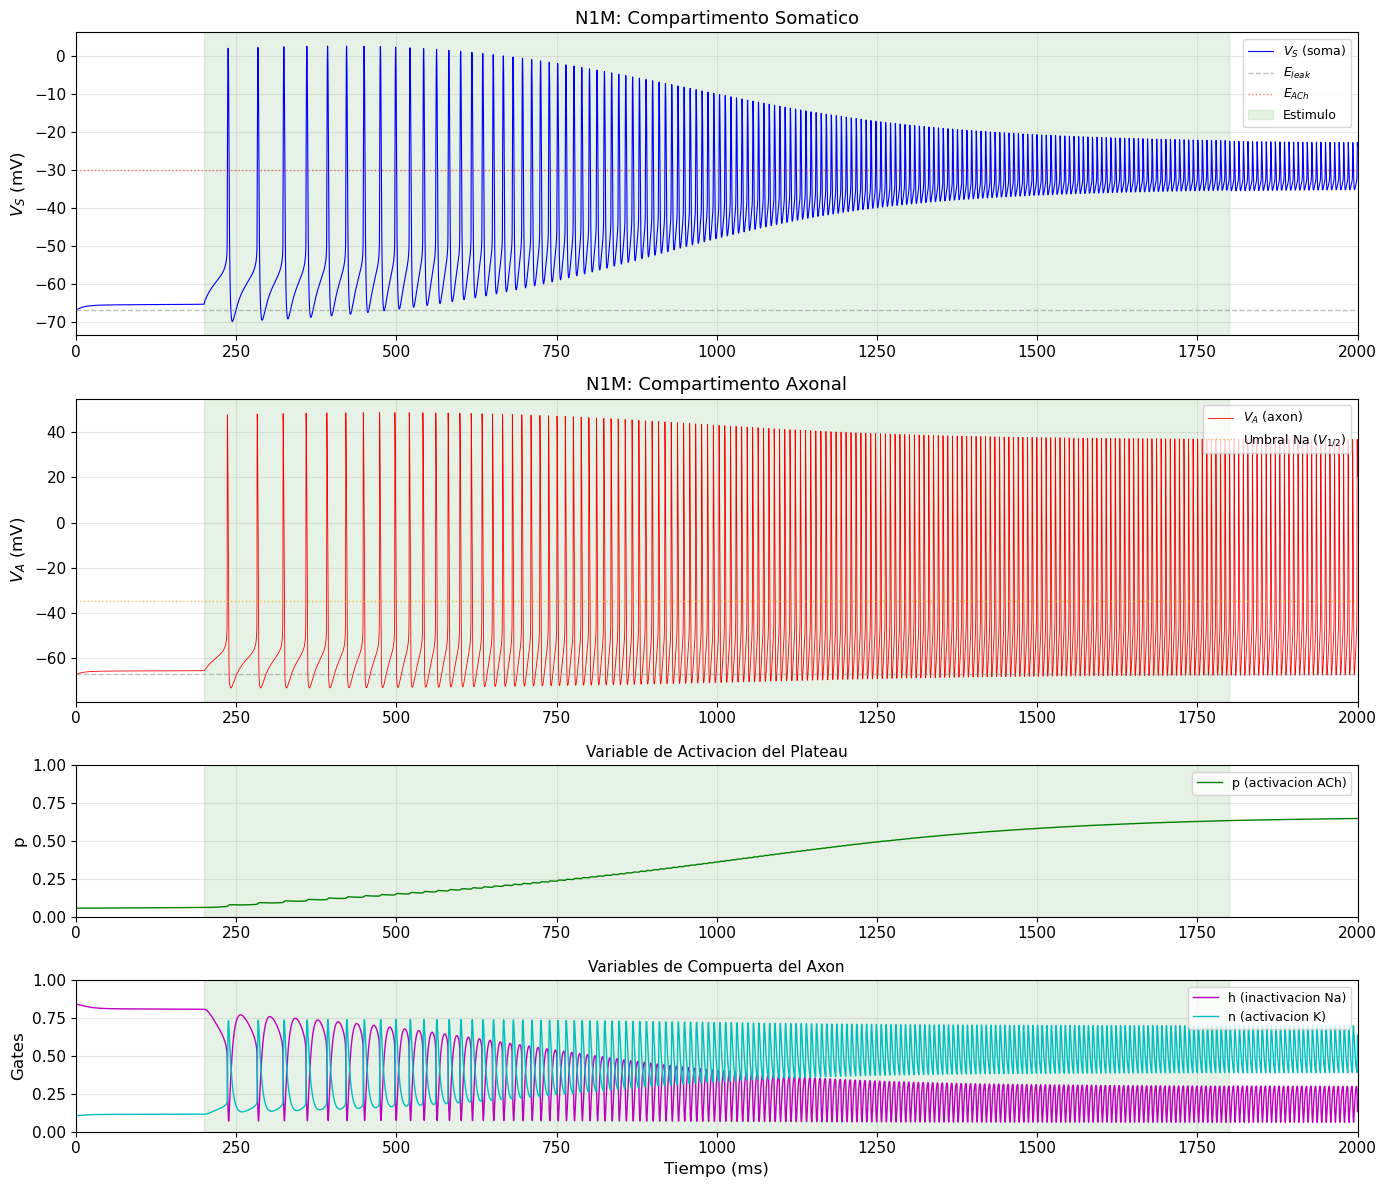


 Estadisticas de N1M 
Voltaje soma - min: -69.95 mV, max: 2.57 mV
Voltaje axon - min: -73.03 mV, max: 48.69 mV
Variable p  - min: 0.0563, max: 0.6485
Variable h  - min: 0.0619, max: 0.8405
Variable n  - min: 0.1066, max: 0.7416


In [3]:
# Simulacion de N1M
datos_n1m = ejecutar_simulacion("N1M")

if datos_n1m is not None:
    t = datos_n1m['tiempo']
    v_soma = datos_n1m['v_soma']
    v_axon = datos_n1m.get('v_axon', None)
    p = datos_n1m.get('p', None)
    h = datos_n1m.get('h', None)
    n_gate = datos_n1m.get('n_gate', None)
    
    fig, axes = plt.subplots(4, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 2, 1, 1]})
    
    # Panel 1: Voltaje del Soma (plateau)
    ax1 = axes[0]
    ax1.plot(t, v_soma, 'b-', linewidth=0.8, label='$V_S$ (soma)')
    ax1.set_ylabel('$V_S$ (mV)', fontsize=12)
    ax1.set_title('N1M: Compartimento Somatico', fontsize=13)
    ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
    ax1.axhline(y=-30, color='red', linestyle=':', alpha=0.5, label='$E_{ACh}$')
    ax1.axvspan(200, 1800, alpha=0.1, color='green', label='Estimulo')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.set_xlim([0, t[-1]])
    
    # Panel 2: Voltaje del Axon
    ax2 = axes[1]
    if v_axon is not None:
        ax2.plot(t, v_axon, 'r-', linewidth=0.6, label='$V_A$ (axon)')
        ax2.set_ylabel('$V_A$ (mV)', fontsize=12)
        ax2.set_title('N1M: Compartimento Axonal', fontsize=13)
        ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5)
        ax2.axhline(y=-34.6, color='orange', linestyle=':', alpha=0.7, label='Umbral Na ($V_{1/2}$)')
        ax2.axvspan(200, 1800, alpha=0.1, color='green')
        ax2.legend(loc='upper right', fontsize=9)
        ax2.set_xlim([0, t[-1]])
    
    # Panel 3: Variable p (activacion del plateau)
    ax3 = axes[2]
    if p is not None:
        ax3.plot(t, p, 'g-', linewidth=1.0, label='p (activacion ACh)')
        ax3.set_ylabel('p', fontsize=12)
        ax3.set_title('Variable de Activacion del Plateau', fontsize=11)
        ax3.axvspan(200, 1800, alpha=0.1, color='green')
        ax3.legend(loc='upper right', fontsize=9)
        ax3.set_xlim([0, t[-1]])
        ax3.set_ylim([0, 1])
    
    # Panel 4: Variables h y n del axon
    ax4 = axes[3]
    if h is not None and n_gate is not None:
        ax4.plot(t, h, 'm-', linewidth=1.0, label='h (inactivacion Na)')
        ax4.plot(t, n_gate, 'c-', linewidth=1.0, label='n (activacion K)')
        ax4.set_xlabel('Tiempo (ms)', fontsize=12)
        ax4.set_ylabel('Gates', fontsize=12)
        ax4.set_title('Variables de Compuerta del Axon', fontsize=11)
        ax4.axvspan(200, 1800, alpha=0.1, color='green')
        ax4.legend(loc='upper right', fontsize=9)
        ax4.set_xlim([0, t[-1]])
        ax4.set_ylim([0, 1])
    
    plt.tight_layout()
    
    os.makedirs('apuntes/imagenes', exist_ok=True)
    plt.savefig('apuntes/imagenes/n1m_aislada.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n Estadisticas de N1M ")
    print(f"Voltaje soma - min: {v_soma.min():.2f} mV, max: {v_soma.max():.2f} mV")
    if v_axon is not None:
        print(f"Voltaje axon - min: {v_axon.min():.2f} mV, max: {v_axon.max():.2f} mV")
    if p is not None:
        print(f"Variable p  - min: {p.min():.4f}, max: {p.max():.4f}")
    if h is not None:
        print(f"Variable h  - min: {h.min():.4f}, max: {h.max():.4f}")
    if n_gate is not None:
        print(f"Variable n  - min: {n_gate.min():.4f}, max: {n_gate.max():.4f}")

In [4]:
from math import exp
print(1 / (1 + exp((-38.8 - 67.0) / 10.0)))

0.9999745812996106


## Analisis de la Dinamica de N1M

### Resultados de la Simulacion

La simulacion reproduce las caracteristicas clave de la neurona N1M segun Vavoulis et al. (2007):

1. **Plateau sostenido**: El voltaje del soma ($V_S$) alcanza valores cercanos a $E_{ACh} = -30$ mV durante la estimulacion, manteniendose en un estado despolarizado estable.

2. **Rafagas de potenciales de accion**: El compartimento axonal genera espigas rapidas (hasta ~45 mV) que se propagan al soma, creando las oscilaciones superpuestas al plateau.

3. **Activacion lenta de p**: La variable $p$ (corriente $i_{ACh}$) se activa con $\tau_p = 250$ ms, controlando la dinamica lenta del plateau.

4. **Interaccion soma-axon**: El acoplamiento electrico bidireccional ($g_{ec} = 8$) permite que:
   - El soma despolarizado active el axon (forward coupling)
   - Las espigas axonales modulen el voltaje somatico (backward coupling)

### ERROR Corregido en VavoulisModel.h ***Comentar a Alicia***

Durante el desarrollo se identifico un error critico en la funcion `eval()`:
- **Error**: `iec(vars[v], vars[va], vars[g_ecs])` usaba el array de **variables** para acceder a los parametros de conductancia
- **Correccion**: `iec(vars[v], vars[va], params[g_ecs])` accede correctamente al array de **parametros**

Este bug causaba que el acoplamiento electrico fuera practicamente nulo (ya que `vars[g_ecs]` apuntaba a valores de compuertas ~0).

### Rol en el CPG

En el circuito completo, N1M:
- Recibe excitacion de **SO** (neurona moduladora) que inicia el ciclo
- Genera la fase de **protraccion** (apertura de la radula)
- **Excita** a **N2v** (sinapsis excitatoria, $g_{syn}=0.077$, $E_{syn}=0$ mV) e **inhibe** a **N3t** (sinapsis inhibitoria, $g_{syn}=5.0$, $E_{syn}=-90$ mV) — Tabla 2 del paper

## N2v: Interneurona de Rasp

La neurona **N2v** (N2 ventral) es responsable de la fase de **rasp** (raspado) del ciclo de alimentacion.

### Propiedades del Compartimento Somático (Tabla 1, Vavoulis 2007)

| Parametro | Ecuacion/Valor | Descripcion |
|-----------|----------------|-------------|
| $i_{NaL}$ | $2 \cdot p^3 \cdot q \cdot (V_S - 55)$ | Corriente de sodio lenta |
| $i_{L,S}$ | $(V_S + 67)$ | Corriente de fuga del soma |
| $i_{ec,S}$ | $0.55 \cdot (V_S - V_A)$ | Acoplamiento electrico soma→axon (**débil**) |
| $p_\infty$ | $1/(1+\exp((-51-V_S)/10.3))$ | Estado estacionario de p |
| $q_\infty$ | $1/(1+\exp((-45-V_S)/-3))$ | Estado estacionario de q (inactivacion) |
| $\tau_p$ | $28.3 + 44.1 \cdot \exp(-((-11.8-V_A)/26.6)^2)$ | ~50 ms (V-dependiente) |
| $\tau_q$ | $187.6 + 637.7 \cdot \exp(-((-9.5-V_A)/23.3)^2)$ | ~500 ms (V-dependiente) |

### Compartimento Axonal (Tabla 3) — Excepción en N2v

El compartimento axonal de N2v es igual al de las demás neuronas **excepto** en el acoplamiento electrotónico:

> *"In the case of N2v only, $i_{ec,A} = 0.06 \cdot (V_A - V_S)$"* — Tabla 3, Vavoulis 2007

| Parametro | N2v | Resto (N1M, N3t, SO) |
|-----------|-----|----------------------|
| $i_{ec,A}$ | $0.06 \cdot (V_A - V_S)$ | $8 \cdot (V_A - V_S)$ |
| $i_{NaT}$, $i_K$, $i_{L,A}$ | Idénticos | Idénticos |
| $h$, $n$ dinámicas | Idénticas | Idénticas |

Este acoplamiento **muy débil** ($g_{ec,A} = 0.06$ vs 8) significa que las espigas axonales de N2v apenas se propagan al soma, lo que es consistente con los registros experimentales donde los potenciales de acción somáticos de N2v son muy atenuados.

### Diferencias clave con N1M

1. **Corriente ionica diferente**: $i_{NaL}$ (sodio lento) vs $i_{ACh}$ (acetilcolina)
2. **Usa variable q**: N2v necesita $p^3 \cdot q$ (N1M solo usa $p^3$)
3. **Acoplamiento débil bidireccional**: $g_{ec,S} = 0.55$, $g_{ec,A} = 0.06$ (vs 8/8 en N1M)
4. **Potencial de reversion**: $E_{NaL} = +55$ mV (despolarizante)
5. **Constantes de tiempo V-dependientes**: $\tau_p$ y $\tau_q$ son funciones gaussianas de $V_A$

### Caracteristicas de la Figura 3B (Vavoulis 2007)

- **(iii)** Oscilaciones a frecuencias muy bajas con estimulacion minima ($i_{inj}$ = 4.1, 4.2, 4.4 mV)
- **(iv)** Curva corriente-frecuencia (F-I response)

Ejecutando N2v...
Simulacion completada: 300000 puntos, 3000.0 ms


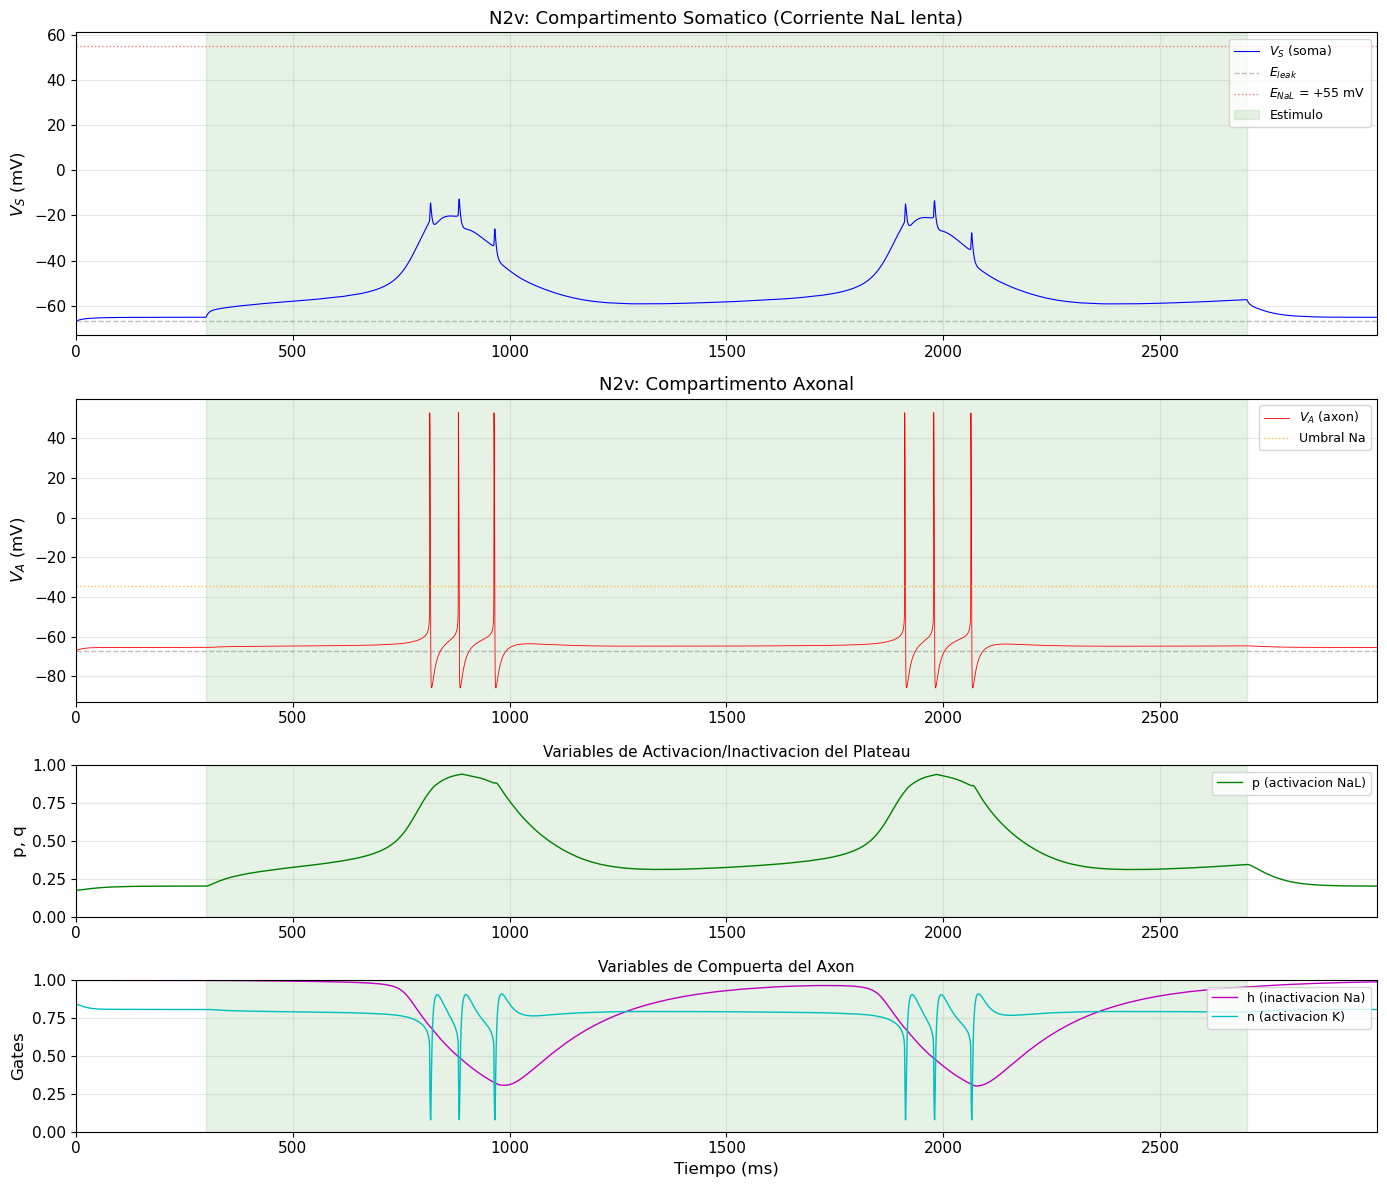


 Estadisticas de N2v 
Voltaje soma - min: -67.00 mV, max: -12.80 mV
Voltaje axon - min: -85.77 mV, max: 52.88 mV
Variable p  - min: 0.1746, max: 0.9412


In [5]:
# Simulacion de N2v
datos_n2v = ejecutar_simulacion("N2v")

if datos_n2v is not None:
    t = datos_n2v['tiempo']
    v_soma = datos_n2v['v_soma']
    v_axon = datos_n2v.get('v_axon', None)
    p = datos_n2v.get('p', None)
    h = datos_n2v.get('h', None)
    n_gate = datos_n2v.get('n_gate', None)
    
    # Para N2v, la columna 4 es q, no p directamente
    # Reinterpretar si hay 7 columnas: t, v, va, p, q, h, n
    data_raw = np.column_stack([datos_n2v[k] for k in datos_n2v.keys()])
    if data_raw.shape[1] >= 7:
        q = data_raw[:, 4]  # q esta en columna 4
        h = data_raw[:, 5]
        n_gate = data_raw[:, 6]
    else:
        q = None
    
    fig, axes = plt.subplots(4, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 2, 1, 1]})
    
    # Panel 1: Voltaje del Soma
    ax1 = axes[0]
    ax1.plot(t, v_soma, 'b-', linewidth=0.8, label='$V_S$ (soma)')
    ax1.set_ylabel('$V_S$ (mV)', fontsize=12)
    ax1.set_title('N2v: Compartimento Somatico (Corriente NaL lenta)', fontsize=13)
    ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
    ax1.axhline(y=55, color='red', linestyle=':', alpha=0.5, label='$E_{NaL}$ = +55 mV')
    ax1.axvspan(300, 2700, alpha=0.1, color='green', label='Estimulo')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.set_xlim([0, t[-1]])
    
    # Panel 2: Voltaje del Axon
    ax2 = axes[1]
    if v_axon is not None:
        ax2.plot(t, v_axon, 'r-', linewidth=0.6, label='$V_A$ (axon)')
        ax2.set_ylabel('$V_A$ (mV)', fontsize=12)
        ax2.set_title('N2v: Compartimento Axonal', fontsize=13)
        ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5)
        ax2.axhline(y=-34.6, color='orange', linestyle=':', alpha=0.7, label='Umbral Na')
        ax2.axvspan(300, 2700, alpha=0.1, color='green')
        ax2.legend(loc='upper right', fontsize=9)
        ax2.set_xlim([0, t[-1]])
    
    # Panel 3: Variables p y q
    ax3 = axes[2]
    if p is not None:
        ax3.plot(t, p, 'g-', linewidth=1.0, label='p (activacion NaL)')
    if q is not None:
        ax3.plot(t, q, 'purple', linewidth=1.0, label='q (inactivacion NaL)')
    ax3.set_ylabel('p, q', fontsize=12)
    ax3.set_title('Variables de Activacion/Inactivacion del Plateau', fontsize=11)
    ax3.axvspan(300, 2700, alpha=0.1, color='green')
    ax3.legend(loc='upper right', fontsize=9)
    ax3.set_xlim([0, t[-1]])
    ax3.set_ylim([0, 1])
    
    # Panel 4: Variables h y n del axon
    ax4 = axes[3]
    if h is not None and n_gate is not None:
        ax4.plot(t, h, 'm-', linewidth=1.0, label='h (inactivacion Na)')
        ax4.plot(t, n_gate, 'c-', linewidth=1.0, label='n (activacion K)')
        ax4.set_xlabel('Tiempo (ms)', fontsize=12)
        ax4.set_ylabel('Gates', fontsize=12)
        ax4.set_title('Variables de Compuerta del Axon', fontsize=11)
        ax4.axvspan(300, 2700, alpha=0.1, color='green')
        ax4.legend(loc='upper right', fontsize=9)
        ax4.set_xlim([0, t[-1]])
        ax4.set_ylim([0, 1])
    
    plt.tight_layout()
    
    os.makedirs('apuntes/imagenes', exist_ok=True)
    plt.savefig('apuntes/imagenes/n2v_aislada.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n Estadisticas de N2v ")
    print(f"Voltaje soma - min: {v_soma.min():.2f} mV, max: {v_soma.max():.2f} mV")
    if v_axon is not None:
        print(f"Voltaje axon - min: {v_axon.min():.2f} mV, max: {v_axon.max():.2f} mV")
    if p is not None:
        print(f"Variable p  - min: {p.min():.4f}, max: {p.max():.4f}")
    if q is not None:
        print(f"Variable q  - min: {q.min():.4f}, max: {q.max():.4f}")

## N3t: Interneurona de Swallow

La neurona **N3t** (N3 tonic) es responsable de la fase de **swallow** (deglución) del ciclo de alimentación.

### Propiedades del Compartimento Somático (Tabla 1, Vavoulis 2007)

| Parámetro | Ecuación/Valor | Descripción |
|-----------|----------------|-------------|
| $i_T$ | $3.27 \cdot p^3 \cdot q \cdot (V_S - 80)$ | Corriente T de calcio (bajo umbral) |
| $i_{L,S}$ | $(V_S + 67)$ | Corriente de fuga del soma |
| $i_{ec,S}$ | $8 \cdot (V_S - V_A)$ | Acoplamiento eléctrico soma→axon |
| $p_\infty$ | $1/(1+\exp((-61.6-V_S)/5.6))$ | Estado estacionario de p |
| $q_\infty$ | $1/(1+\exp((-73.2-V_S)/-5.1))$ | Estado estacionario de q (inactivación) |
| $\tau_p$ | 4 ms | Constante de tiempo muy rápida |
| $\tau_q$ | 400 ms | Constante de tiempo lenta |

### Compartimento Axonal (Tabla 3, común a N1M, N3t y SO)

Idéntico al descrito para N1M: $i_{NaT}$, $i_K$, $i_{L,A}$ con $g_{ec,A} = 8$.

### Diferencias clave con N1M y N2v

1. **Corriente T de calcio**: Corriente de bajo umbral ($E_{Ca} = +80$ mV)
2. **Activación muy rápida**: $\tau_p = 4$ ms (vs 250 ms en N1M, ~50 ms en N2v)
3. **Post-inhibitory rebound (PIR)**: Propiedad característica de las corrientes T
4. **Umbral bajo**: $p_\infty$ tiene $V_{1/2} = -61.6$ mV (hiperpolarizado)
5. **Acoplamiento fuerte**: $g_{ec} = 8/8$ (como N1M, a diferencia de N2v)

### Características de la Figura 3C (Vavoulis 2007)

- **(iii)** Dependencia del rebote post-inhibitorio con la fuerza del estímulo hiperpolarizante ($i_{inj}$ = -2, -4, -8 mV)
- El PIR permite que N3t dispare al terminar la inhibición de N2v en el circuito CPG

Ejecutando N3t...
Simulacion completada: 400000 puntos, 4000.0 ms


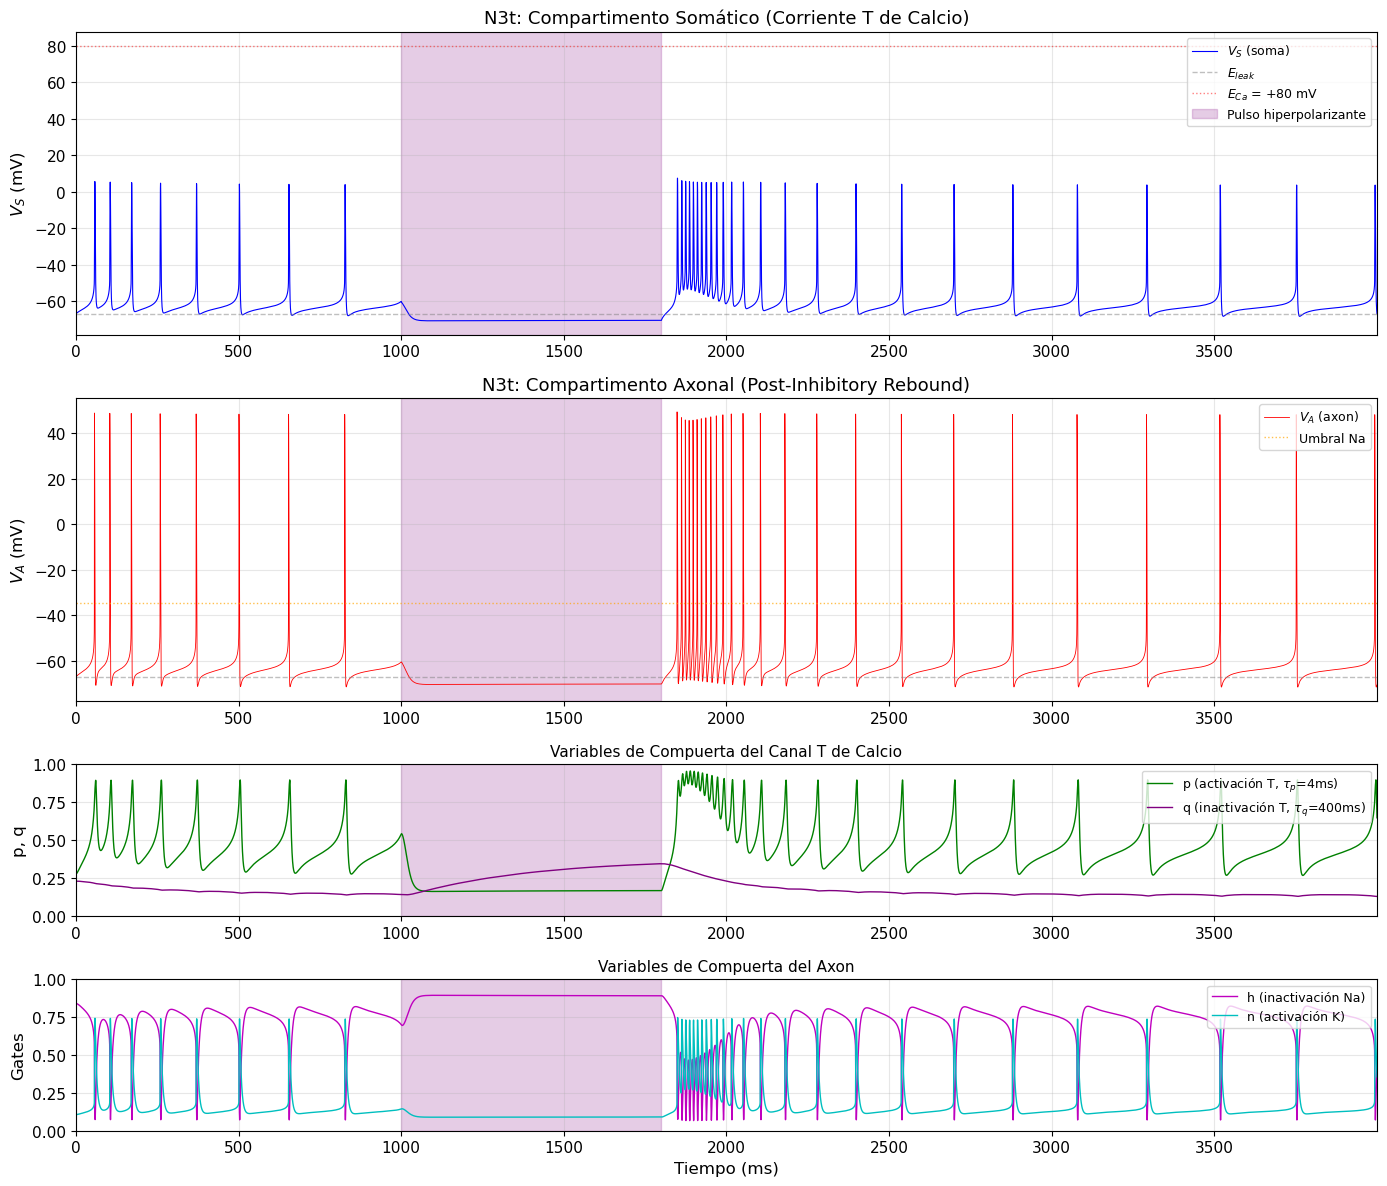


 Estadísticas de N3t 
Voltaje soma - min: -70.86 mV, max: 7.35 mV
Voltaje axon - min: -71.54 mV, max: 49.40 mV
Variable p  - min: 0.1607, max: 0.9569
Variable q  - min: 0.1280, max: 0.3443


In [6]:
# Simulacion de N3t
datos_n3t = ejecutar_simulacion("N3t")

if datos_n3t is not None:
    t = datos_n3t['tiempo']
    v_soma = datos_n3t['v_soma']
    v_axon = datos_n3t.get('v_axon', None)
    p = datos_n3t.get('p', None)
    
    # Para N3t, la salida es: t, v, va, p, q, h, n
    import subprocess
    from io import StringIO
    result = subprocess.run(
        [os.path.join(BUILD_DIR_NEURONAS, "N3t")],
        capture_output=True, text=True, cwd=BUILD_DIR_NEURONAS
    )
    data_raw = np.loadtxt(StringIO(result.stdout))
    
    t = data_raw[:, 0]
    v_soma = data_raw[:, 1]
    v_axon = data_raw[:, 2]
    p = data_raw[:, 3]
    q = data_raw[:, 4]
    h = data_raw[:, 5]
    n_gate = data_raw[:, 6]
    
    # Crear figura con 4 paneles
    fig, axes = plt.subplots(4, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 2, 1, 1]})
    
    # Panel 1: Voltaje del Soma
    ax1 = axes[0]
    ax1.plot(t, v_soma, 'b-', linewidth=0.8, label='$V_S$ (soma)')
    ax1.set_ylabel('$V_S$ (mV)', fontsize=12)
    ax1.set_title('N3t: Compartimento Somático (Corriente T de Calcio)', fontsize=13)
    ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
    ax1.axhline(y=80, color='red', linestyle=':', alpha=0.5, label='$E_{Ca}$ = +80 mV')
    ax1.axvspan(1000, 1800, alpha=0.2, color='purple', label='Pulso hiperpolarizante')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.set_xlim([0, t[-1]])
    
    # Panel 2: Voltaje del Axon
    ax2 = axes[1]
    ax2.plot(t, v_axon, 'r-', linewidth=0.6, label='$V_A$ (axon)')
    ax2.set_ylabel('$V_A$ (mV)', fontsize=12)
    ax2.set_title('N3t: Compartimento Axonal (Post-Inhibitory Rebound)', fontsize=13)
    ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5)
    ax2.axhline(y=-34.6, color='orange', linestyle=':', alpha=0.7, label='Umbral Na')
    ax2.axvspan(1000, 1800, alpha=0.2, color='purple')
    ax2.legend(loc='upper right', fontsize=9)
    ax2.set_xlim([0, t[-1]])
    
    # Panel 3: Variables p y q (canal T)
    ax3 = axes[2]
    ax3.plot(t, p, 'g-', linewidth=1.0, label='p (activación T, $\\tau_p$=4ms)')
    ax3.plot(t, q, 'purple', linewidth=1.0, label='q (inactivación T, $\\tau_q$=400ms)')
    ax3.set_ylabel('p, q', fontsize=12)
    ax3.set_title('Variables de Compuerta del Canal T de Calcio', fontsize=11)
    ax3.axvspan(1000, 1800, alpha=0.2, color='purple')
    ax3.legend(loc='upper right', fontsize=9)
    ax3.set_xlim([0, t[-1]])
    ax3.set_ylim([0, 1])
    
    ax4 = axes[3]
    ax4.plot(t, h, 'm-', linewidth=1.0, label='h (inactivación Na)')
    ax4.plot(t, n_gate, 'c-', linewidth=1.0, label='n (activación K)')
    ax4.set_xlabel('Tiempo (ms)', fontsize=12)
    ax4.set_ylabel('Gates', fontsize=12)
    ax4.set_title('Variables de Compuerta del Axon', fontsize=11)
    ax4.axvspan(1000, 1800, alpha=0.2, color='purple')
    ax4.legend(loc='upper right', fontsize=9)
    ax4.set_xlim([0, t[-1]])
    ax4.set_ylim([0, 1])
    
    plt.tight_layout()
    
    os.makedirs('apuntes/imagenes', exist_ok=True)
    plt.savefig('apuntes/imagenes/n3t_aislada.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Estadisticas
    print(f"\n Estadísticas de N3t ")
    print(f"Voltaje soma - min: {v_soma.min():.2f} mV, max: {v_soma.max():.2f} mV")
    print(f"Voltaje axon - min: {v_axon.min():.2f} mV, max: {v_axon.max():.2f} mV")
    print(f"Variable p  - min: {p.min():.4f}, max: {p.max():.4f}")
    print(f"Variable q  - min: {q.min():.4f}, max: {q.max():.4f}")

## SO: Neurona Moduladora

La neurona **SO** (Slow Oscillator) es una neurona **moduladora pasiva** que controla el inicio del ciclo de alimentación.

### Propiedades del Compartimento Somático (Tabla 1, Vavoulis 2007)

| Parámetro | Ecuación/Valor | Descripción |
|-----------|----------------|-------------|
| $i_X$ | 0 | Sin corriente intrínseca en el soma |
| $i_{L,S}$ | $(V_S + 67)$ | Corriente de fuga del soma |
| $i_{ec,S}$ | $8 \cdot (V_S - V_A)$ | Acoplamiento eléctrico soma→axon |

SO no tiene variables de compuerta somáticas ($p$, $q$). Solo se definen como 0 (sin efecto dinámico).

### Compartimento Axonal (Tabla 3, común a N1M, N3t y SO)

Idéntico al descrito para N1M: $i_{NaT}$, $i_K$, $i_{L,A}$ con $g_{ec,A} = 8$.

### Características clave

1. **Soma pasivo**: Sin corrientes intrínsecas activas ($i_X = 0$), toda la excitabilidad reside en el axón
2. **Acoplamiento fuerte**: $g_{ec} = 8/8$ permite que los spikes axonales se reflejen en el soma
3. **No oscila por sí sola**: Necesita corriente inyectada ($I_{drive}$) para disparar tónicamente
4. **Papel modulador**: Provee excitación a N1M ($g_{syn}=4.0$) y N2v ($g_{syn}=1.0$), controlando la frecuencia del CPG. Es inhibida por N2v ($g_{syn}=8.0$) durante la fase de rasp.

### Características de la Figura 3D (Vavoulis 2007)

- **(iv)** SO como neurona pasiva sin actividad intrínseca: permanece en reposo sin estímulo externo
- El comportamiento de SO depende enteramente de la entrada sináptica de la red o de corriente inyectada

Ejecutando SO...
Simulacion completada: 300000 puntos, 3000.0 ms


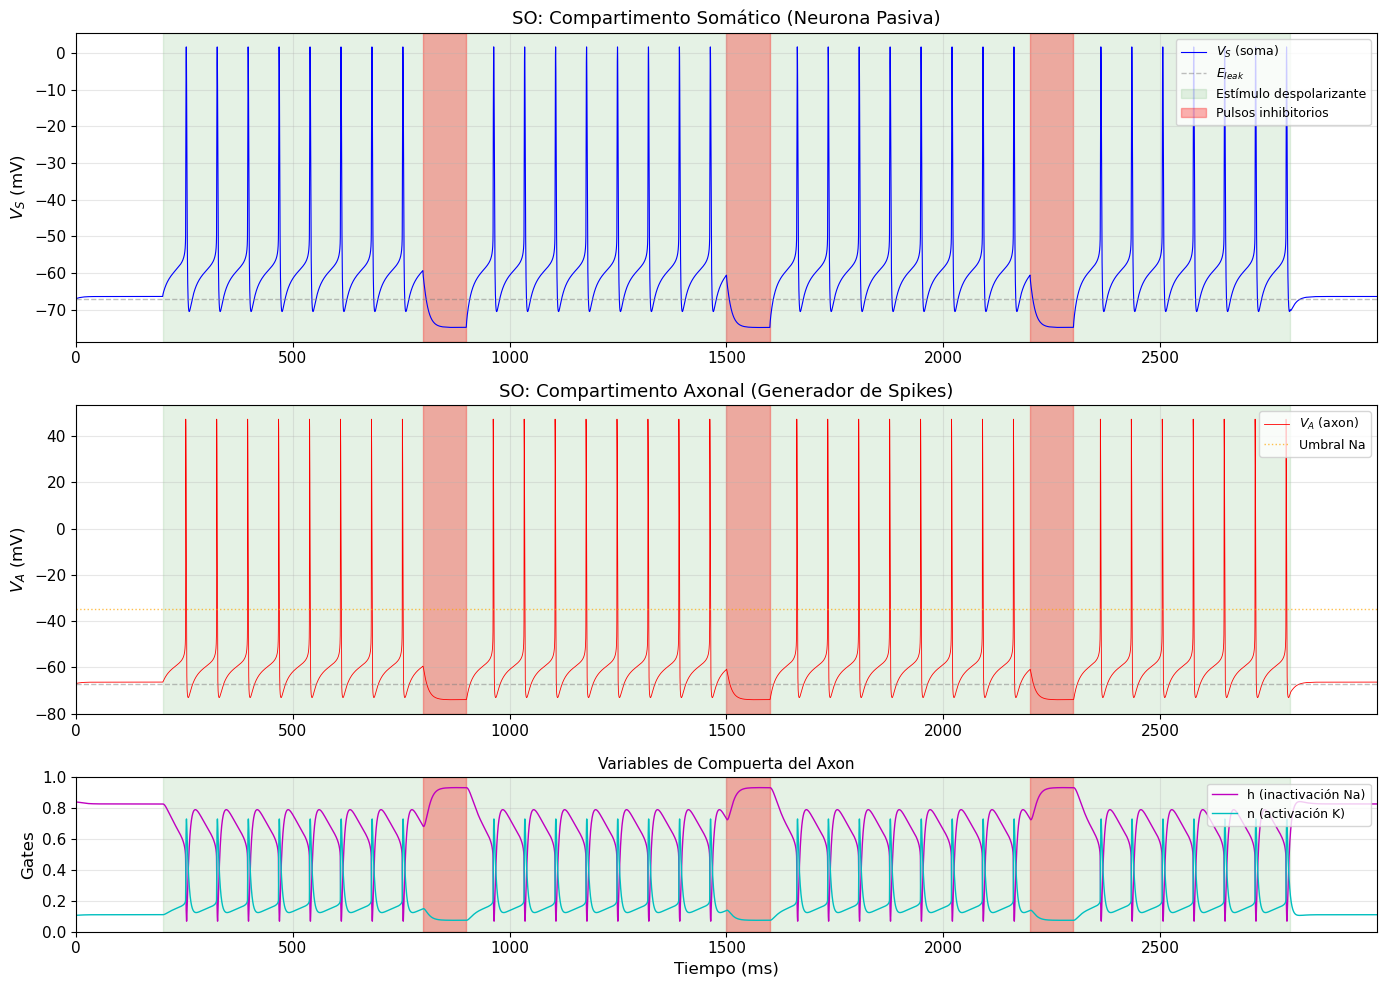


 Estadísticas de SO 
Voltaje soma - min: -74.88 mV, max: 1.63 mV
Voltaje axon - min: -73.98 mV, max: 47.31 mV
Variable p  - min: 0.0000, max: 0.0000 (no usado)
Variable q  - min: 0.0000, max: 0.0000 (no usado)
Variable q  - min: 0.0000, max: 0.0000 (no usado)
Variable q  - min: 0.0000, max: 0.0000 (no usado)


In [7]:
# Simulacion de SO
datos_so = ejecutar_simulacion("SO")

if datos_so is not None:
    # Recargar datos crudos para obtener todas las columnas
    import subprocess
    from io import StringIO
    result = subprocess.run(
        [os.path.join(BUILD_DIR_NEURONAS, "SO")],
        capture_output=True, text=True, cwd=BUILD_DIR_NEURONAS
    )
    data_raw = np.loadtxt(StringIO(result.stdout))
    
    t = data_raw[:, 0]
    v_soma = data_raw[:, 1]
    v_axon = data_raw[:, 2]
    p = data_raw[:, 3]  # No usado para SO (siempre 0)
    q = data_raw[:, 4]  # No usado para SO (siempre 0)
    h = data_raw[:, 5]
    n_gate = data_raw[:, 6]
    
    # Crear figura con 3 paneles (SO no tiene variables p, q activas)
    fig, axes = plt.subplots(3, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 2, 1]})
    
    #  Panel 1: Voltaje del Soma 
    ax1 = axes[0]
    ax1.plot(t, v_soma, 'b-', linewidth=0.8, label='$V_S$ (soma)')
    ax1.set_ylabel('$V_S$ (mV)', fontsize=12)
    ax1.set_title('SO: Compartimento Somático (Neurona Pasiva)', fontsize=13)
    ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
    # Marcar estimulacion y pulsos inhibitorios
    ax1.axvspan(200, 2800, alpha=0.1, color='green', label='Estímulo despolarizante')
    ax1.axvspan(800, 900, alpha=0.3, color='red', label='Pulsos inhibitorios')
    ax1.axvspan(1500, 1600, alpha=0.3, color='red')
    ax1.axvspan(2200, 2300, alpha=0.3, color='red')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.set_xlim([0, t[-1]])
    
    # Panel 2: Voltaje del Axon
    ax2 = axes[1]
    ax2.plot(t, v_axon, 'r-', linewidth=0.6, label='$V_A$ (axon)')
    ax2.set_ylabel('$V_A$ (mV)', fontsize=12)
    ax2.set_title('SO: Compartimento Axonal (Generador de Spikes)', fontsize=13)
    ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5)
    ax2.axhline(y=-34.6, color='orange', linestyle=':', alpha=0.7, label='Umbral Na')
    ax2.axvspan(200, 2800, alpha=0.1, color='green')
    ax2.axvspan(800, 900, alpha=0.3, color='red')
    ax2.axvspan(1500, 1600, alpha=0.3, color='red')
    ax2.axvspan(2200, 2300, alpha=0.3, color='red')
    ax2.legend(loc='upper right', fontsize=9)
    ax2.set_xlim([0, t[-1]])
    
    # Panel 3: Variables h y n del axon
    ax3 = axes[2]
    ax3.plot(t, h, 'm-', linewidth=1.0, label='h (inactivación Na)')
    ax3.plot(t, n_gate, 'c-', linewidth=1.0, label='n (activación K)')
    ax3.set_xlabel('Tiempo (ms)', fontsize=12)
    ax3.set_ylabel('Gates', fontsize=12)
    ax3.set_title('Variables de Compuerta del Axon', fontsize=11)
    ax3.axvspan(200, 2800, alpha=0.1, color='green')
    ax3.axvspan(800, 900, alpha=0.3, color='red')
    ax3.axvspan(1500, 1600, alpha=0.3, color='red')
    ax3.axvspan(2200, 2300, alpha=0.3, color='red')
    ax3.legend(loc='upper right', fontsize=9)
    ax3.set_xlim([0, t[-1]])
    ax3.set_ylim([0, 1])
    
    plt.tight_layout()
    
    os.makedirs('apuntes/imagenes', exist_ok=True)
    plt.savefig('apuntes/imagenes/so_aislada.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n Estadísticas de SO ")
    print(f"Voltaje soma - min: {v_soma.min():.2f} mV, max: {v_soma.max():.2f} mV")
    print(f"Voltaje axon - min: {v_axon.min():.2f} mV, max: {v_axon.max():.2f} mV")
    print(f"Variable p  - min: {p.min():.4f}, max: {p.max():.4f} (no usado)")
    print(f"Variable q  - min: {q.min():.4f}, max: {q.max():.4f} (no usado)")
    print(f"Variable q  - min: {q.min():.4f}, max: {q.max():.4f} (no usado)")
    print(f"Variable q  - min: {q.min():.4f}, max: {q.max():.4f} (no usado)")

### Neuronas del CPG (Modelo de dos compartimentos, Vavoulis 2007)

| Neurona | Corriente $i_X$ | $\tau_p$ | $\tau_q$ | $g_{ec}$ | Comportamiento |
|---------|-----------------|----------|----------|----------|----------------|
| **N1M** | $i_{ACh}$ (200·p³·(V+30)) | 250 ms | - | 8/8 | Plateau + spikes |
| **N2v** | $i_{NaL}$ (2·p³·q·(V-55)) | ~50 ms (V-dep) | ~500 ms (V-dep) | 0.55/0.06 | Oscilaciones lentas |
| **N3t** | $i_T$ (3.27·p³·q·(V-80)) | 4 ms | 400 ms | 8/8 | Post-inhibitory rebound |
| **SO** | 0 (pasiva) | - | - | 8/8 | Spiking regular |

### Neurona Moduladora (Modelo de un compartimento, Vavoulis 2010)

| Neurona | Corrientes | Variables dinámicas | Baseline | Comportamiento |
|---------|-----------|---------------------|----------|----------------|
| **CGC** | $i_{NaT}$, $i_{NaP}$, $i_A$, $i_D$, $i_{LVA}$, $i_{HVA}$ | $V$, $h$, $r$, $a$, $b$, $n$, $e$, $f$ | −60 mV | Tónico ~0.7 Hz, plasticidad balanceada |

## CGC: Interneurona Moduladora Cerebral (Cerebral Giant Cell)

> **Referencia**: Vavoulis et al. (2010) — *"Balanced plasticity and stability of the electrical properties of a molluscan modulatory interneuron after classical conditioning: a computational study"*
> Front. Behav. Neurosci. 4:19. doi: 10.3389/fnbeh.2010.00019

Las **Cerebral Giant Cells (CGCs)** son un par de interneuronas moduladoras serotoninérgicas identificadas en el SNC de *Lymnaea stagnalis*. A diferencia de las neuronas del CPG (N1M, N2v, N3t, SO), las CGCs **modulan** el circuito de alimentación sin formar parte directa del generador de patrón central.

### Diferencias fundamentales con las neuronas del CPG

| Característica | CPG (N1M, N2v, N3t, SO) | CGC |
|---|---|---|
| **Modelo** | Dos compartimentos (soma + axón) | **Un solo compartimento** |
| **Corrientes** | 2-3 corrientes (leak, $i_X$, $i_{NaT}$, $i_K$) | **6 corrientes iónicas** |
| **Variables** | 6 ($V_S$, $V_A$, $p$, $q$, $h$, $n$) | **8** ($V$, $h$, $r$, $a$, $b$, $n$, $e$, $f$) |
| **Paper** | Vavoulis et al. (2007) | Vavoulis et al. (**2010**) |
| **Leak** | $i_L = V + 67$ | No tiene corriente de fuga explícita |
| **Signo $I_{syn}$** | $-I_{syn}$ en ecuación de $V$ | $+I_{syn}$ en ecuación de $V$ |

### Modelo Matemático (Un Compartimento)

$$C_m \frac{dV}{dt} = I_{ext} - i_{NaT} - i_{NaP} - i_A - i_D - i_{LVA} - i_{HVA}$$

### Las 6 Corrientes Iónicas (Tabla 1, Vavoulis 2010)

| Corriente | Fórmula | Tipo | $E_{rev}$ | $g_{max}$ (mS/cm²) |
|-----------|---------|------|-----------|---------------------|
| $i_{NaT}$ | $g_{NaT} \cdot m_\infty^3 \cdot h \cdot (V - E_{Na})$ | Na transitorio rápido (TTX-sensible) | +55 mV | 1.68 |
| $i_{NaP}$ | $g_{NaP} \cdot r^3 \cdot (V - E_{Na})$ | Na persistente (TTX-resistente) | +55 mV | 0.44 |
| $i_A$ | $g_A \cdot a^4 \cdot b \cdot (V - E_K)$ | K transitorio (4-AP-sensible) | −90 mV | 18.82 |
| $i_D$ | $g_D \cdot n^4 \cdot (V - E_K)$ | K rectificador retardado (TEA-sensible) | −90 mV | 1.20 |
| $i_{LVA}$ | $g_{LVA} \cdot c_\infty^3 \cdot d_\infty \cdot (V - E_{Ca})$ | Ca bajo umbral (tipo T) | +80 mV | 0.01 |
| $i_{HVA}$ | $g_{HVA} \cdot e^3 \cdot f \cdot (V - E_{Ca})$ | Ca alto umbral | +80 mV | 1.03 |

### Variables de Compuerta

Cada variable de compuerta sigue cinética de primer orden:
$$\frac{dx}{dt} = \frac{x_\infty(V) - x}{\tau_x(V)}$$

Con:
$$x_\infty(V) = \frac{1}{1 + e^{(V_H^x - V)/V_S^x}} \qquad \tau_x(V) = \tau_0^x \cdot e^{\delta_x (V_H^x - V)/V_S^x} \cdot x_\infty(V)$$

| Variable | Tipo | Corriente | $V_H$ (mV) | $V_S$ (mV) | $\tau_0$ (ms) | $\delta$ | Estimación |
|----------|------|-----------|-------------|-------------|---------------|----------|------------|
| $m$ | Activación instantánea | $i_{NaT}$ | −35.20 | 9.66 | — | — | Current-clamp |
| $h$ | Inactivación | $i_{NaT}$ | −56.43 | −8.41 | 778.82 | 0.03 | Current-clamp |
| $r$ | Activación | $i_{NaP}$ | −47.03 | 20.55 | 4.01 | 1.00 | Current-clamp |
| $a$ | Activación | $i_A$ | −36.37 | 8.72 | 13.28 | 0.39 | Voltage-clamp† |
| $b$ | Inactivación | $i_A$ | −83.00 | −6.20 | 266.75 | 0.83 | Voltage-clamp† |
| $n$ | Activación | $i_D$ | −59.43 | 34.79 | 14.52 | 0.18 | Current-clamp |
| $c$ | Activación instantánea | $i_{LVA}$ | −41.35 | 5.05 | — | — | Voltage-clamp† |
| $d$ | Inactivación instantánea | $i_{LVA}$ | −64.13 | −4.03 | — | — | Voltage-clamp† |
| $e$ | Activación | $i_{HVA}$ | −14.25 | 6.96 | 3.81 | 0.84 | Current-clamp |
| $f$ | Inactivación | $i_{HVA}$ | −21.44 | −5.78 | 34.68 | 0.97 | Voltage-clamp† |

†Parámetros estimados desde datos de voltage-clamp; el resto desde current-clamp.

### Propiedades Electrofisiológicas Clave (Figura 4, Vavoulis 2010)

1. **Disparo tónico espontáneo**: ~0.7 Hz (~42 spikes/min) sin estímulo externo
2. **Forma del potencial de acción**: Pico ~+40 mV, duración ~17 ms (medida a −20 mV)
3. **"Shoulder" característico**: Hombro durante la repolarización (contribución de $i_{HVA}$)
4. **Afterhyperpolarization**: La membrana alcanza ~−75 mV tras cada spike, retornando a baseline ~−60 mV
5. **Respuesta corriente-frecuencia**: 0–2 nA → frecuencias hasta ~15 Hz

### Papel en la Red de Alimentación

- **Modula el CPG**: Las CGCs son interneuronas **serotoninérgicas** que modulan las neuronas del CPG (N1M, N2v, N3t, SO)
- **Frecuencia estrecha**: Deben disparar entre 0.6–1 Hz para cumplir su rol modulador normal
- **Condicionamiento clásico**: Tras condicionamiento, las CGCs se despolarizan ~2.5 mV pero **mantienen** su frecuencia de disparo estable (plasticidad balanceada)
- **Mecanismo**: Aumento balanceado de $g_{NaP}$ y $g_D$ (+ $g_{HVA}$) explica la despolarización con estabilización de frecuencia

### Condiciones Iniciales de la CGC

El potencial de reposo basal de la CGC es $V_0 \approx -60$ mV (Figura 4, Vavoulis 2010). Todas las variables de compuerta se inicializan en su valor de equilibrio $x_\infty(V_0)$:

$$x_\infty(V_0) = \frac{1}{1 + e^{(V_H - V_0)/V_S}}$$

| Variable | $V_H$ | $V_S$ | $x_\infty(-60)$ | Expresión en código |
|----------|--------|--------|------------------|---------------------|
| $V$ | — | — | −60.0 mV | `-60.0` |
| $h$ | −56.43 | −8.41 | $\frac{1}{1+e^{(-56.43-(-60))/(-8.41)}} = 0.605$ | `1.0/(1.0+exp((-56.43-(-60.0))/-8.41))` |
| $r$ | −47.03 | 20.55 | $\frac{1}{1+e^{(-47.03-(-60))/20.55}} = 0.347$ | `1.0/(1.0+exp((-47.03-(-60.0))/20.55))` |
| $a$ | −36.37 | 8.72 | $\frac{1}{1+e^{(-36.37-(-60))/8.72}} = 0.062$ | `1.0/(1.0+exp((-36.37-(-60.0))/8.72))` |
| $b$ | −83.00 | −6.20 | $\frac{1}{1+e^{(-83-(-60))/(-6.2)}} = 0.024$ | `1.0/(1.0+exp((-83.00-(-60.0))/-6.20))` |
| $n$ | −59.43 | 34.79 | $\frac{1}{1+e^{(-59.43-(-60))/34.79}} = 0.496$ | `1.0/(1.0+exp((-59.43-(-60.0))/34.79))` |
| $e$ | −14.25 | 6.96 | $\frac{1}{1+e^{(-14.25-(-60))/6.96}} = 0.001$ | `1.0/(1.0+exp((-14.25-(-60.0))/6.96))` |
| $f$ | −21.44 | −5.78 | $\frac{1}{1+e^{(-21.44-(-60))/(-5.78)}} = 0.999$ | `1.0/(1.0+exp((-21.44-(-60.0))/-5.78))` |

### Notas sobre las variables

1. **Variables de activación** ($r$, $a$, $n$, $e$): Pendiente $V_S > 0$, valores bajos en reposo (canales cerrados), excepto $n$ ($\approx 0.5$, parcialmente activo)
2. **Variables de inactivación** ($h$, $b$, $f$): Pendiente $V_S < 0$, $h \approx 0.6$ (parcialmente disponible), $b \approx 0.02$ (casi completamente inactivada), $f \approx 1.0$ (completamente disponible)
3. **Variables instantáneas** ($m$, $c$, $d$): No son variables de estado, se calculan como $x_\infty(V)$ en cada paso sin dinámica propia
4. **Diferencia con CPG**: El reposo es −60 mV (no −67 mV como en las neuronas del CPG)

Ejecutando CGC...
Simulacion completada: 300000 puntos, 3000.0 ms


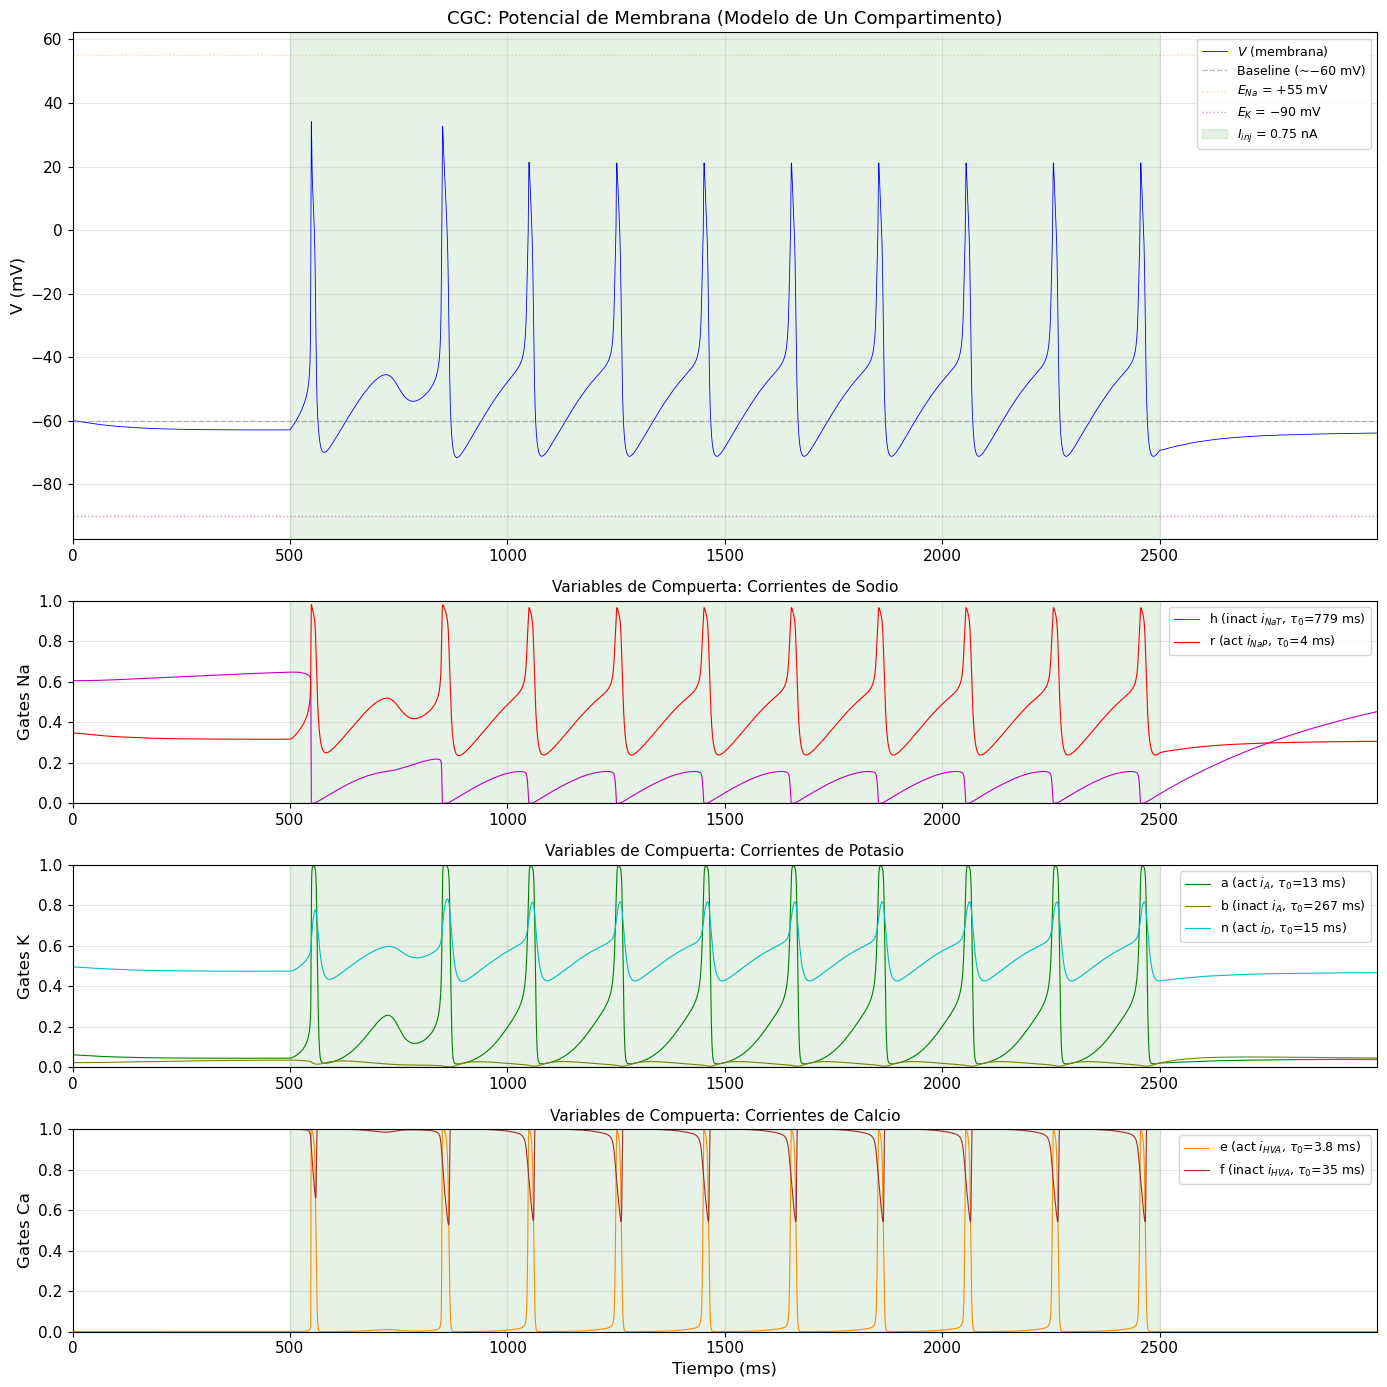


 Estadísticas de CGC 
Voltaje     - min: -71.60 mV, max: 34.12 mV
Variable h  - min: 0.0000, max: 0.6471
Variable r  - min: 0.2348, max: 0.9809
Variable a  - min: 0.0173, max: 0.9984
Variable b  - min: 0.0036, max: 0.0519
Variable n  - min: 0.4248, max: 0.8311
Variable e  - min: 0.0003, max: 0.9990
Variable f  - min: 0.5269, max: 0.9998

Spikes detectados: 10
Amplitud media de spike: 23.60 mV
Frecuencia media: 4.72 Hz
Periodo medio: 211.9 ms


In [8]:
# Simulacion de CGC (Cerebral Giant Cell)
# Modelo de un compartimento con 6 corrientes iónicas (Vavoulis et al., 2010)

# Ejecutar simulacion CGC
print("Ejecutando CGC...")
result = subprocess.run(
    [os.path.join(BUILD_DIR_NEURONAS, "CGC")],
    capture_output=True, text=True, cwd=BUILD_DIR_NEURONAS
)

if result.returncode != 0:
    print(f"Error en la simulacion:\n{result.stderr}")
else:
    # Parsear datos: tiempo, V, h, r, a, b, n, e, f
    data_cgc = np.loadtxt(StringIO(result.stdout))
    
    t_cgc = data_cgc[:, 0]
    v_cgc = data_cgc[:, 1]
    h_cgc = data_cgc[:, 2]
    r_cgc = data_cgc[:, 3]
    a_cgc = data_cgc[:, 4]
    b_cgc = data_cgc[:, 5]
    n_cgc = data_cgc[:, 6]
    e_cgc = data_cgc[:, 7]
    f_cgc = data_cgc[:, 8]
    
    print(f"Simulacion completada: {len(t_cgc)} puntos, {t_cgc[-1]:.1f} ms")
    
    # --- Figura con 4 paneles ---
    fig, axes = plt.subplots(4, 1, figsize=(14, 14), gridspec_kw={'height_ratios': [2.5, 1, 1, 1]})
    
    # Panel 1: Voltaje de membrana
    ax1 = axes[0]
    ax1.plot(t_cgc, v_cgc, 'b-', linewidth=0.6, label='$V$ (membrana)')
    ax1.set_ylabel('V (mV)', fontsize=12)
    ax1.set_title('CGC: Potencial de Membrana (Modelo de Un Compartimento)', fontsize=13)
    ax1.axhline(y=-60, color='gray', linestyle='--', alpha=0.5, label='Baseline (~−60 mV)')
    ax1.axhline(y=55, color='orange', linestyle=':', alpha=0.4, label='$E_{Na}$ = +55 mV')
    ax1.axhline(y=-90, color='purple', linestyle=':', alpha=0.4, label='$E_K$ = −90 mV')
    ax1.axvspan(500, 2500, alpha=0.1, color='green', label='$I_{inj}$ = 0.75 nA')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.set_xlim([0, t_cgc[-1]])
    
    # Panel 2: Corrientes de Na (h = inact NaT, r = act NaP)
    ax2 = axes[1]
    ax2.plot(t_cgc, h_cgc, 'm-', linewidth=0.8, label='h (inact $i_{NaT}$, $\\tau_0$=779 ms)')
    ax2.plot(t_cgc, r_cgc, 'r-', linewidth=0.8, label='r (act $i_{NaP}$, $\\tau_0$=4 ms)')
    ax2.set_ylabel('Gates Na', fontsize=12)
    ax2.set_title('Variables de Compuerta: Corrientes de Sodio', fontsize=11)
    ax2.axvspan(500, 2500, alpha=0.1, color='green')
    ax2.legend(loc='upper right', fontsize=9)
    ax2.set_xlim([0, t_cgc[-1]])
    ax2.set_ylim([0, 1])
    
    # Panel 3: Corrientes de K (a, b = iA; n = iD)
    ax3 = axes[2]
    ax3.plot(t_cgc, a_cgc, 'g-', linewidth=0.8, label='a (act $i_A$, $\\tau_0$=13 ms)')
    ax3.plot(t_cgc, b_cgc, 'olive', linewidth=0.8, label='b (inact $i_A$, $\\tau_0$=267 ms)')
    ax3.plot(t_cgc, n_cgc, 'c-', linewidth=0.8, label='n (act $i_D$, $\\tau_0$=15 ms)')
    ax3.set_ylabel('Gates K', fontsize=12)
    ax3.set_title('Variables de Compuerta: Corrientes de Potasio', fontsize=11)
    ax3.axvspan(500, 2500, alpha=0.1, color='green')
    ax3.legend(loc='upper right', fontsize=9)
    ax3.set_xlim([0, t_cgc[-1]])
    ax3.set_ylim([0, 1])
    
    # Panel 4: Corrientes de Ca (e, f = iHVA)
    ax4 = axes[3]
    ax4.plot(t_cgc, e_cgc, 'darkorange', linewidth=0.8, label='e (act $i_{HVA}$, $\\tau_0$=3.8 ms)')
    ax4.plot(t_cgc, f_cgc, 'brown', linewidth=0.8, label='f (inact $i_{HVA}$, $\\tau_0$=35 ms)')
    ax4.set_xlabel('Tiempo (ms)', fontsize=12)
    ax4.set_ylabel('Gates Ca', fontsize=12)
    ax4.set_title('Variables de Compuerta: Corrientes de Calcio', fontsize=11)
    ax4.axvspan(500, 2500, alpha=0.1, color='green')
    ax4.legend(loc='upper right', fontsize=9)
    ax4.set_xlim([0, t_cgc[-1]])
    ax4.set_ylim([0, 1])
    
    plt.tight_layout()
    
    os.makedirs('apuntes/imagenes', exist_ok=True)
    plt.savefig('apuntes/imagenes/cgc_aislada.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Estadisticas
    print(f"\n Estadísticas de CGC ")
    print(f"Voltaje     - min: {v_cgc.min():.2f} mV, max: {v_cgc.max():.2f} mV")
    print(f"Variable h  - min: {h_cgc.min():.4f}, max: {h_cgc.max():.4f}")
    print(f"Variable r  - min: {r_cgc.min():.4f}, max: {r_cgc.max():.4f}")
    print(f"Variable a  - min: {a_cgc.min():.4f}, max: {a_cgc.max():.4f}")
    print(f"Variable b  - min: {b_cgc.min():.4f}, max: {b_cgc.max():.4f}")
    print(f"Variable n  - min: {n_cgc.min():.4f}, max: {n_cgc.max():.4f}")
    print(f"Variable e  - min: {e_cgc.min():.4f}, max: {e_cgc.max():.4f}")
    print(f"Variable f  - min: {f_cgc.min():.4f}, max: {f_cgc.max():.4f}")
    
    # Detectar spikes
    from scipy.signal import find_peaks
    peaks_cgc, _ = find_peaks(v_cgc, height=-20, distance=100)
    if len(peaks_cgc) > 0:
        print(f"\nSpikes detectados: {len(peaks_cgc)}")
        print(f"Amplitud media de spike: {v_cgc[peaks_cgc].mean():.2f} mV")
        if len(peaks_cgc) > 1:
            periodos_cgc = np.diff(t_cgc[peaks_cgc])
            freq_cgc = 1000.0 / periodos_cgc.mean()
            print(f"Frecuencia media: {freq_cgc:.2f} Hz")
            print(f"Periodo medio: {periodos_cgc.mean():.1f} ms")
    else:
        print("\nNo se detectaron spikes (la neurona no disparó con esta corriente).")

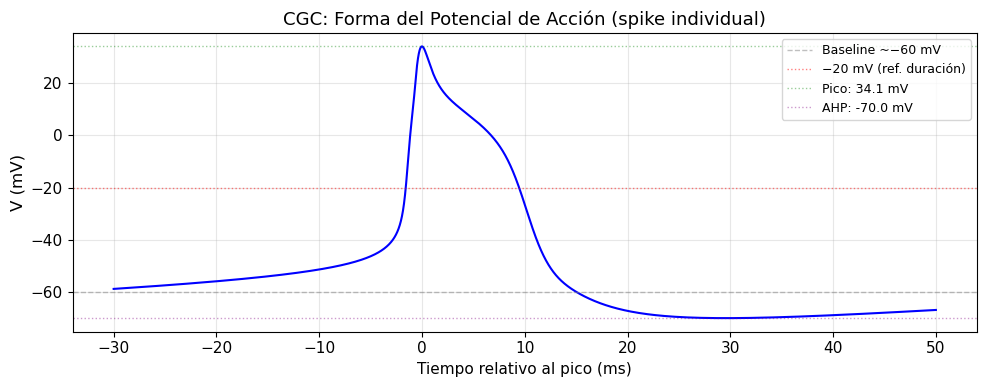


 Spike individual de la CGC 
Pico:      34.1 mV
AHP:       -70.0 mV
Amplitud:  104.1 mV (pico a AHP)

 Paper (Figura 4B): pico +40 mV, AHP -75 mV, duración 17 ms


In [9]:
# Zoom en un solo spike de la CGC (Figura 4B, Vavoulis 2010)
# Seleccionar un spike estable (el 1er spike disponible)
if len(peaks_cgc) >= 1:
    spike_idx = peaks_cgc[0]  # 1er spike disponible
    t_spike = t_cgc[spike_idx]
    
    # Ventana de ±30 ms alrededor del pico
    t_window_start = t_spike - 30
    t_window_end = t_spike + 50
    mask_spike = (t_cgc >= t_window_start) & (t_cgc <= t_window_end)
    
    # Tiempo relativo al pico (0 = pico del spike)
    t_rel = t_cgc[mask_spike] - t_spike
    
    # Figura con un solo panel
    fig, ax1 = plt.subplots(figsize=(10, 4))
    
    # Panel único: Voltaje — forma del potencial de acción
    ax1.plot(t_rel, v_cgc[mask_spike], 'b-', linewidth=1.5)
    ax1.set_ylabel('V (mV)', fontsize=12)
    ax1.set_xlabel('Tiempo relativo al pico (ms)', fontsize=11)
    ax1.set_title('CGC: Forma del Potencial de Acción (spike individual)', fontsize=13)
    ax1.axhline(y=-60, color='gray', linestyle='--', alpha=0.5, label='Baseline ~−60 mV')
    ax1.axhline(y=-20, color='red', linestyle=':', alpha=0.5, label='−20 mV (ref. duración)')
    
    # Medir duración a -20 mV
    v_spike = v_cgc[mask_spike]

    # Marcar pico y AHP
    ax1.axhline(y=v_cgc[spike_idx], color='green', linestyle=':', alpha=0.4, 
                label=f'Pico: {v_cgc[spike_idx]:.1f} mV')
    v_ahp = v_spike.min()
    ax1.axhline(y=v_ahp, color='purple', linestyle=':', alpha=0.4,
                label=f'AHP: {v_ahp:.1f} mV')
    ax1.legend(loc='upper right', fontsize=9)
    
    plt.tight_layout()
    os.makedirs('apuntes/imagenes', exist_ok=True)
    plt.savefig('apuntes/imagenes/cgc_spike_individual.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Estadísticas del spike
    amplitude = v_cgc[spike_idx] - v_ahp
    print(f"\n Spike individual de la CGC ")
    print(f"Pico:      {v_cgc[spike_idx]:.1f} mV")
    print(f"AHP:       {v_ahp:.1f} mV")
    print(f"Amplitud:  {amplitude:.1f} mV (pico a AHP)")
    print(f"\n Paper (Figura 4B): pico +40 mV, AHP -75 mV, duración 17 ms")
else:
    print("No hay suficientes spikes para hacer zoom.")

## Análisis de la Dinámica de la CGC **TODO ESTO ES DEL PAPER DE 2010 NO DE NUESTRO EXPERIMENTO**

### Propiedades Esperadas (Vavoulis 2010, Figura 4)

Según el paper, la CGC aislada sin estímulo externo debe:
1. **Disparar tónicamente** a ~0.7 Hz (~42 spikes/min)
2. **Potencial de acción** con pico ~+40 mV y duración ~17 ms (medida a −20 mV)
3. **"Shoulder"** durante la repolarización (contribución de $i_{HVA}$)
4. **Afterhyperpolarization** hasta ~−75 mV, retornando gradualmente a baseline ~−60 mV
5. **Respuesta F-I**: Con corrientes inyectadas de 0–2 nA, frecuencias hasta ~15 Hz

### Contribución de Cada Corriente (Figuras 5A-C, Vavoulis 2010)

| Experimento simulado | Efecto | Mecanismo |
|---------------------|--------|-----------|
| Quitar Na ($g_{NaT}=g_{NaP}=0$) | Cesa disparo, hiperpolarización a ~−90 mV | Na total es fuerza despolarizante principal |
| Bloquear $i_D$ (30% $g_D$) | Spikes más anchos, AHP reducida ~12 mV | $i_D$ repolariza la membrana durante el spike |
| Bloquear $i_{HVA}$ ($g_{HVA}=0$) | Pérdida del "shoulder", spike −6 ms, −17 mV | $i_{HVA}$ contribuye a amplitud y duración del spike |

### Plasticidad Balanceada (Figuras 6-7, Vavoulis 2010)

El resultado central del paper: tras condicionamiento clásico, la CGC se despolariza ~2.5 mV **sin cambiar** su frecuencia de disparo. El modelo explica esto mediante:

1. **Aumento de $g_{NaP}$** (hasta 50%): Despolariza la membrana pero aumenta drásticamente la frecuencia
2. **Aumento balanceado de $g_D$** (~misma proporción): Contrarresta el aumento de frecuencia
3. **Aumento adicional de $g_{HVA}$** (20%): Compensa la reducción de amplitud y duración del spike

$$\boxed{g_{NaP} \uparrow + g_D \uparrow \Rightarrow \text{despolarización} + \text{frecuencia estable}}$$
$$\boxed{g_{HVA} \uparrow \Rightarrow \text{amplitud y forma del spike estables}}$$

### Rol en el Circuito de Alimentación

En el circuito completo, la CGC:
- **Modula serotoninérgicamente** las neuronas del CPG (N1M, N2v, N3t, SO)
- Dispara a frecuencia estrecha (0.6–1 Hz) necesaria para su función moduladora normal (Yeoman et al., 1994)
- Tras condicionamiento: **recluta neuronas de comando** que activan el circuito motor de alimentación (Kemenes et al., 2006)
- La despolarización persistente facilita vías sensoriales hacia neuronas de comando por **facilitación dependiente de calcio**

# Figura 4: Circuitos del CPG

## 4A(ii): El Pacemaker Central N1M ↔ N2v

El circuito **N1M ↔ N2v** forma el "core pacemaker" del CPG de alimentación. Este circuito mínimo es capaz de generar **oscilaciones bifásicas** autosostenidas.

### Conectividad Sináptica (Tabla 2, Vavoulis 2007)

Las conexiones entre N1M y N2v son **sinapsis químicas graduales** (no eléctricas):

| Conexión | Tipo | $g_{syn}$ | $E_{syn}$ (mV) | $\tau_{syn}$ (ms) | Función |
|----------|------|-----------|----------------|-------------------|---------|
| **N1M → N2v** | Excitatoria | 0.077 | 0 | 200 | N1M activa lentamente a N2v para iniciar rasp |
| **N2v → N1M** | Inhibitoria | 50.0 | -90 | 50 | N2v termina fuertemente la protracción de N1M |

### ¿Por qué sinapsis químicas y no eléctricas?

1. **Unidireccionalidad funcional**: Las sinapsis eléctricas son bidireccionales. Aquí necesitamos que N1M **excite** a N2v pero N2v **inhiba** a N1M.

2. **Polaridad opuesta**: Los efectos son opuestos (excitación vs inhibición), imposible con sinapsis eléctrica.

3. **Retardos sinápticos**: Las sinapsis químicas introducen retardos temporales esenciales para la generación del ritmo.

4. **Transmisión gradual**: El voltaje presináptico controla gradualmente la activación sináptica, sin necesidad de potenciales de acción completos.

### Modelo de Sinapsis Química con Activación Gradual

Siguiendo **Vavoulis et al. (2007)**, usamos el **modelo de activación gradual** basado en ecuaciones diferenciales de segundo orden. Este modelo permite que la sinapsis se active de forma **gradual** en respuesta al voltaje presináptico, incluso sin potenciales de acción completos.

#### Dinámica de Segundo Orden (α-function)

La activación sináptica $s$ sigue una dinámica de segundo orden (Wilson, 1999):

$$\tau_{syn} \frac{dr}{dt} = r_{\infty} - r$$

$$\tau_{syn} \frac{ds}{dt} = r - s$$

Donde:
- $r$: Variable intermedia de activación
- $s$: Activación sináptica final (0 ≤ s ≤ 1)
- $\tau_{syn}$: Constante de tiempo característica (50-200 ms)
- $r_{\infty}$: Estado estacionario dependiente del voltaje presináptico

#### Activación Dependiente del Voltaje

La activación sináptica responde de forma **sigmoidal** al voltaje presináptico:

$$r_{\infty}(V_{pre}) = \frac{1}{1 + e^{(V_r - V_{pre})/\Delta V}}$$

Parámetros típicos:
- $V_r = -40$ mV (umbral de activación)
- $\Delta V = 2.5$ mV (pendiente de la sigmoide)

**Características clave:**
- La sinapsis se activa **gradualmente** con despolarizaciones pequeñas
- No requiere potenciales de acción all-or-none
- Permite **transmisión analógica** del voltaje presináptico

#### Corriente Sináptica

La corriente sináptica postsináptica es:

$$I_{syn} = g_{syn} \cdot s(t) \cdot (V_{post} - E_{syn})$$

Donde:
- $g_{syn}$: Conductancia sináptica máxima
- $E_{syn}$: Potencial de reversión
  - **Excitatoria**: $E_{syn} = 0$ mV (colinérgica)
  - **Inhibitoria**: $E_{syn} = -90$ mV (GABAérgica/glicinérgica)
- $s(t)$: Activación sináptica (0-1)

### Modelo de Activación Gradual

1. **Coincide con lo natural**: Reproduce la transmisión gradual observada en cultivos de neuronas del CPG

In [10]:
# Simulación del circuito N1M <-> N2v (Core Pacemaker)
# Figura 4A(ii) - Vavoulis et al. (2007)

# Recompilar si es necesario
compilar_proyecto()

# Ejecutar simulación del circuito N1M-N2v
print("Ejecutando simulación del circuito N1M <-> N2v...")
result = subprocess.run(
    [os.path.join(BUILD_DIR_CIRCUITOS, "N1N2")],
    capture_output=True, text=True, cwd=BUILD_DIR_CIRCUITOS
)

if result.returncode != 0:
    print(f"Error: {result.stderr}")
else:
    # Parsear datos
    # Formato: tiempo, V_N1M_soma, V_N1M_axon, V_N2v_soma, V_N2v_axon, 
    #          I_syn_N1M->N2v, I_syn_N2v->N1M, p_N1M, p_N2v, q_N2v
    data = np.loadtxt(StringIO(result.stdout))
    
    t = data[:, 0]
    v_n1m_soma = data[:, 1]
    v_n1m_axon = data[:, 2]
    v_n2v_soma = data[:, 3]
    v_n2v_axon = data[:, 4]
    i_n1m_to_n2v = data[:, 5]
    i_n2v_to_n1m = data[:, 6]
    p_n1m = data[:, 7]
    p_n2v = data[:, 8]
    q_n2v = data[:, 9]
    
    print(f"Simulación completada: {len(t)} puntos, {t[-1]/1000:.1f} segundos")
    print(f"Rango de tiempo: {t[0]:.1f} - {t[-1]:.1f} ms")

Compilando proyecto...
Compilacion exitosa.
Ejecutando simulación del circuito N1M <-> N2v...
Simulación completada: 1000000 puntos, 10.0 segundos
Rango de tiempo: 0.0 - 10000.0 ms


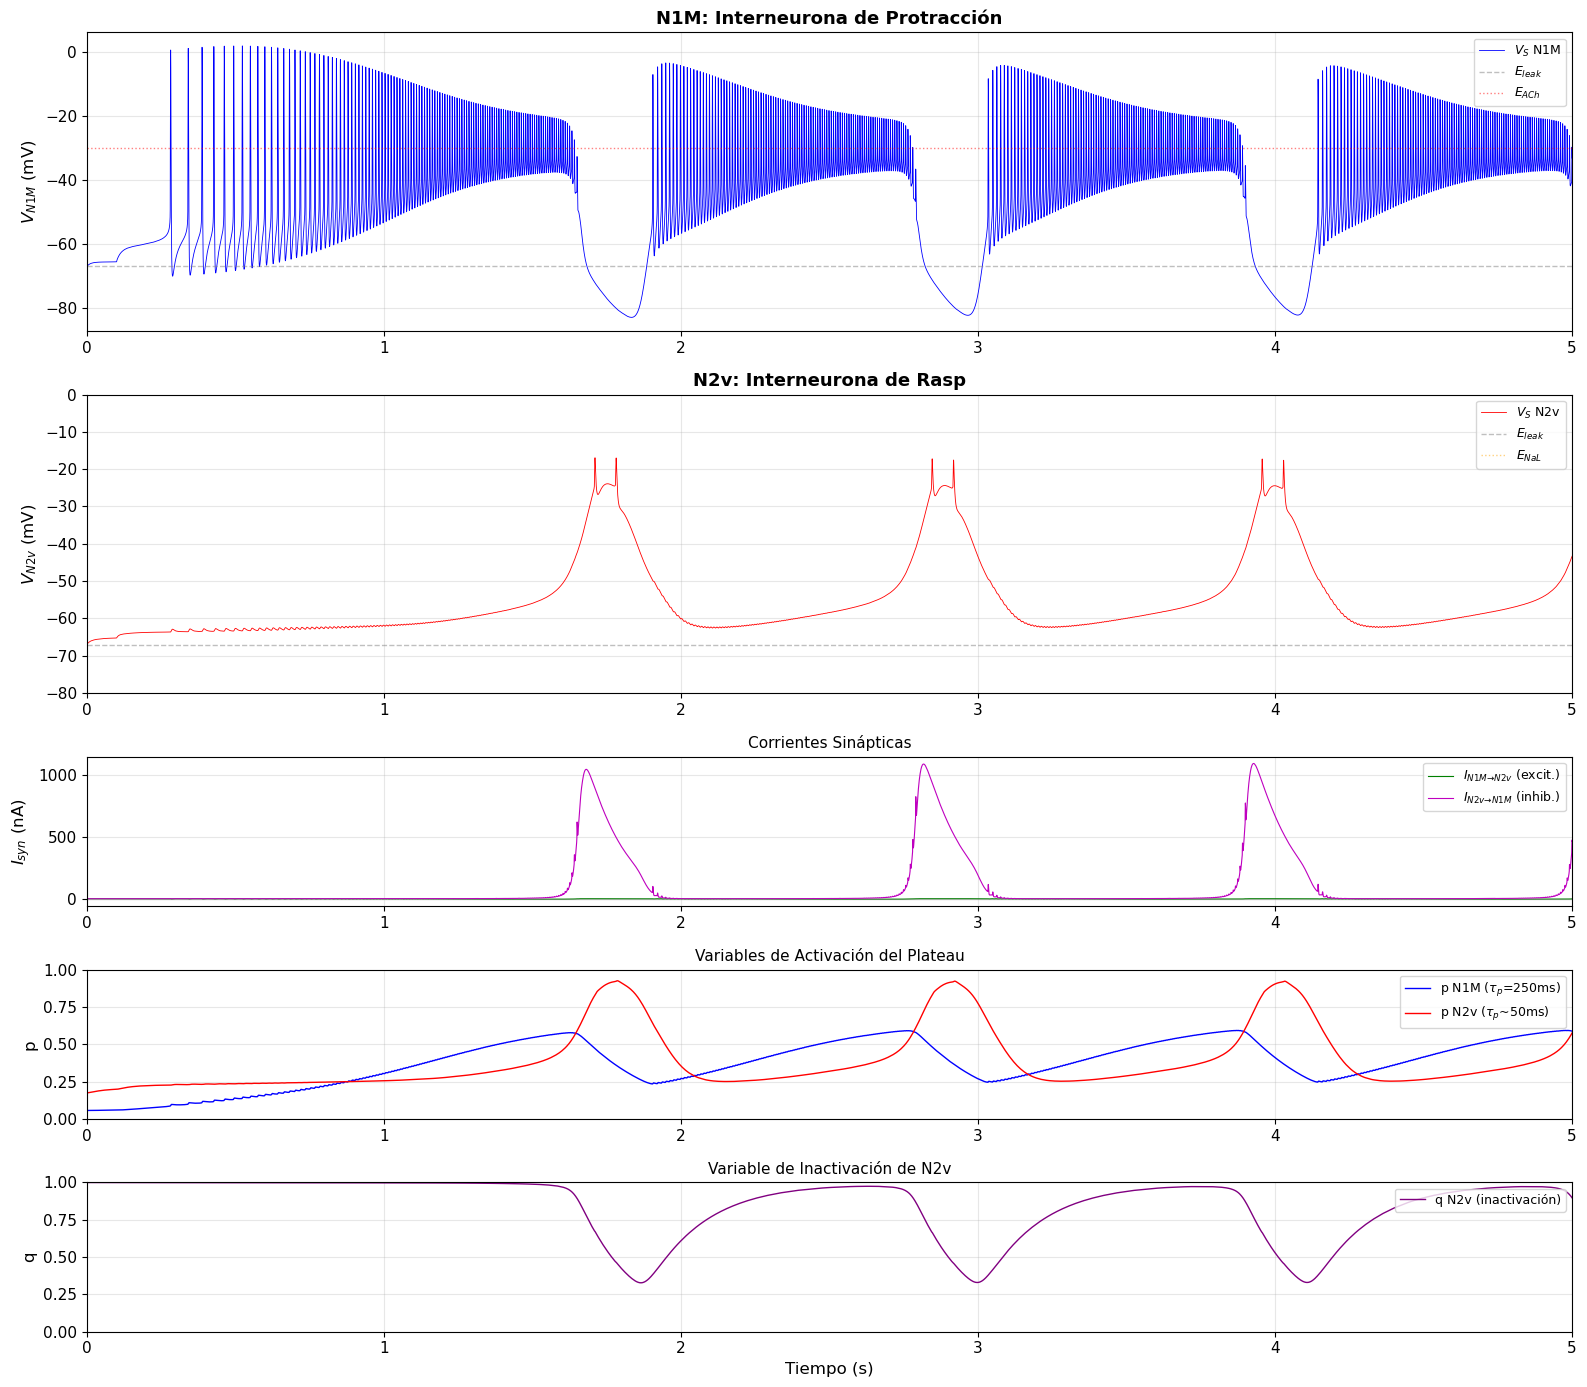

ESTADÍSTICAS DEL CIRCUITO N1M <-> N2v
N1M soma - min: -82.90 mV, max: 1.87 mV
N2v soma - min: -67.00 mV, max: -16.94 mV
I_syn N1M→N2v - min: -3.9450, max: -0.0000
I_syn N2v→N1M - min: 0.0000, max: 1093.2200


In [11]:
# Visualización del circuito N1M <-> N2v
# Mostramos los primeros 5 segundos para ver las oscilaciones

# Seleccionar rango de tiempo para visualización (primeros 5 segundos)
t_max_plot = 5000  # ms
mask = t <= t_max_plot

fig, axes = plt.subplots(5, 1, figsize=(16, 14), gridspec_kw={'height_ratios': [2, 2, 1, 1, 1]})

# Panel 1: Voltaje somático de N1M
ax1 = axes[0]
ax1.plot(t[mask]/1000, v_n1m_soma[mask], 'b-', linewidth=0.6, label='$V_S$ N1M')
ax1.set_ylabel('$V_{N1M}$ (mV)', fontsize=12)
ax1.set_title('N1M: Interneurona de Protracción', fontsize=13, fontweight='bold')
ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
ax1.axhline(y=-30, color='red', linestyle=':', alpha=0.5, label='$E_{ACh}$')
ax1.legend(loc='upper right', fontsize=9)
ax1.set_xlim([0, t_max_plot/1000])

# Panel 2: Voltaje somático de N2v
ax2 = axes[1]
ax2.plot(t[mask]/1000, v_n2v_soma[mask], 'r-', linewidth=0.6, label='$V_S$ N2v')
ax2.set_ylabel('$V_{N2v}$ (mV)', fontsize=12)
ax2.set_title('N2v: Interneurona de Rasp', fontsize=13, fontweight='bold')
ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
ax2.axhline(y=55, color='orange', linestyle=':', alpha=0.5, label='$E_{NaL}$')
ax2.legend(loc='upper right', fontsize=9)
ax2.set_xlim([0, t_max_plot/1000])
ax2.set_ylim([-80, 0])
# Panel 3: Corrientes sinápticas
ax3 = axes[2]
ax3.plot(t[mask]/1000, i_n1m_to_n2v[mask], 'g-', linewidth=0.8, label='$I_{N1M→N2v}$ (excit.)')
ax3.plot(t[mask]/1000, i_n2v_to_n1m[mask], 'm-', linewidth=0.8, label='$I_{N2v→N1M}$ (inhib.)')
ax3.set_ylabel('$I_{syn}$ (nA)', fontsize=12)
ax3.set_title('Corrientes Sinápticas', fontsize=11)
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax3.legend(loc='upper right', fontsize=9)
ax3.set_xlim([0, t_max_plot/1000])

# Panel 4: Variables p de activación
ax4 = axes[3]
ax4.plot(t[mask]/1000, p_n1m[mask], 'b-', linewidth=1.0, label='p N1M ($\\tau_p$=250ms)')
ax4.plot(t[mask]/1000, p_n2v[mask], 'r-', linewidth=1.0, label='p N2v ($\\tau_p$~50ms)')
ax4.set_ylabel('p', fontsize=12)
ax4.set_title('Variables de Activación del Plateau', fontsize=11)
ax4.legend(loc='upper right', fontsize=9)
ax4.set_xlim([0, t_max_plot/1000])
ax4.set_ylim([0, 1])

# Panel 5: Variable q de N2v (inactivación)
ax5 = axes[4]
ax5.plot(t[mask]/1000, q_n2v[mask], 'purple', linewidth=1.0, label='q N2v (inactivación)')
ax5.set_xlabel('Tiempo (s)', fontsize=12)
ax5.set_ylabel('q', fontsize=12)
ax5.set_title('Variable de Inactivación de N2v', fontsize=11)
ax5.legend(loc='upper right', fontsize=9)
ax5.set_xlim([0, t_max_plot/1000])
ax5.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('apuntes/imagenes/n1m_n2v_circuit.png', dpi=150, bbox_inches='tight')
plt.show()

print("ESTADÍSTICAS DEL CIRCUITO N1M <-> N2v")
print(f"N1M soma - min: {v_n1m_soma[mask].min():.2f} mV, max: {v_n1m_soma[mask].max():.2f} mV")
print(f"N2v soma - min: {v_n2v_soma[mask].min():.2f} mV, max: {v_n2v_soma[mask].max():.2f} mV")
print(f"I_syn N1M→N2v - min: {i_n1m_to_n2v[mask].min():.4f}, max: {i_n1m_to_n2v[mask].max():.4f}")
print(f"I_syn N2v→N1M - min: {i_n2v_to_n1m[mask].min():.4f}, max: {i_n2v_to_n1m[mask].max():.4f}")

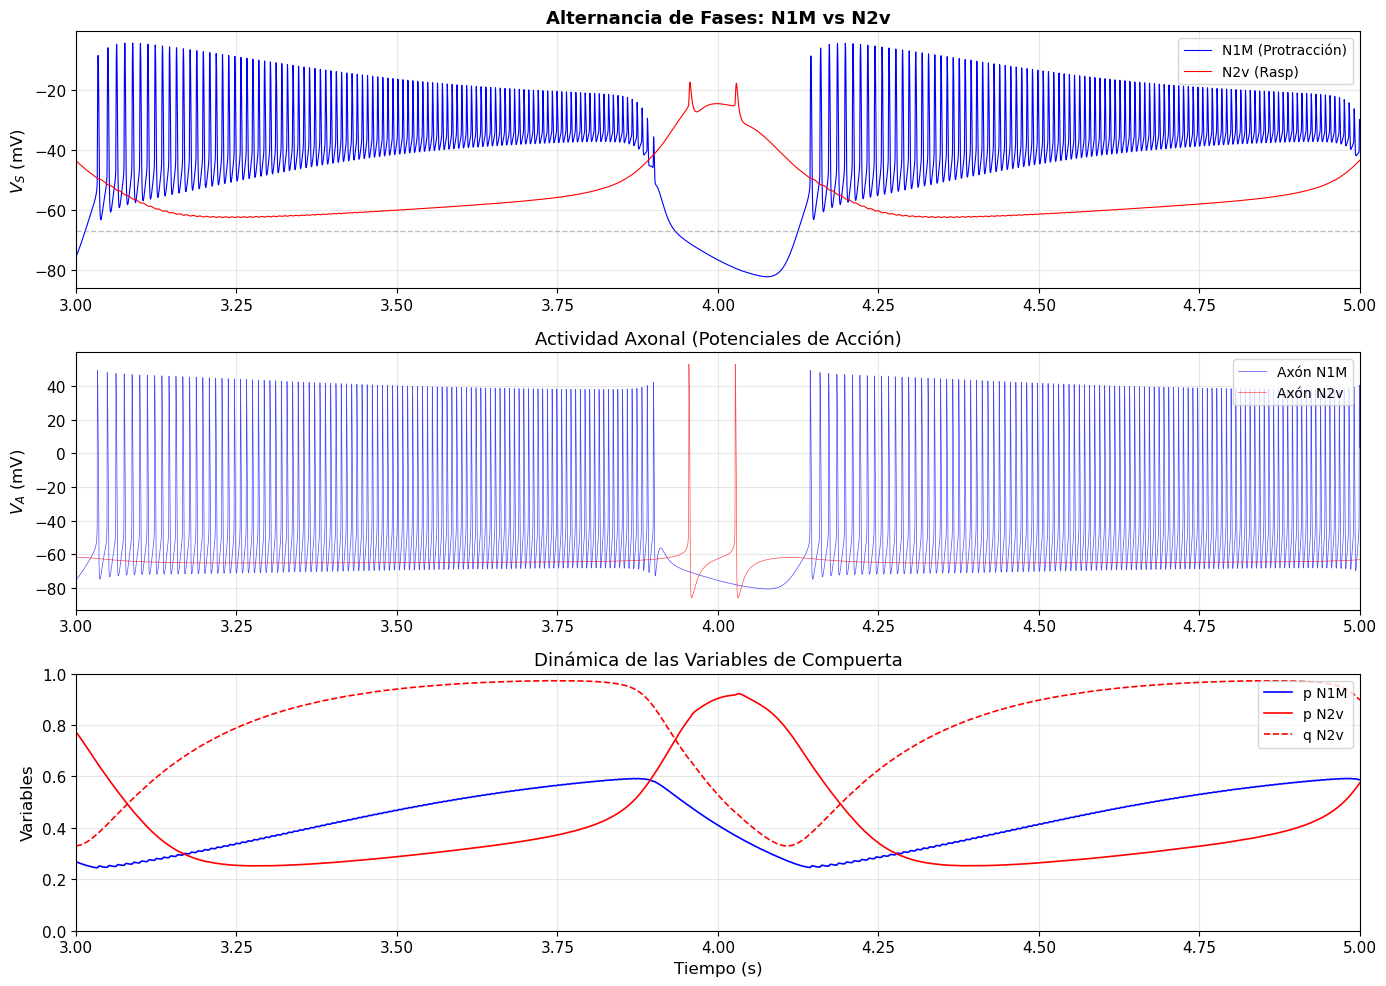


ANÁLISIS DEL RITMO:
Picos detectados en N1M: 118
Período medio: 16.8 ms
Frecuencia: 59.547 Hz (3572.8 ciclos/min)


In [12]:
# Análisis detallado: Zoom en ciclos individuales
# Mostramos 2 segundos en el régimen estacionario para ver la estructura del ritmo

t_start_zoom = 3000  # ms - después del transitorio inicial
t_end_zoom = 5000    # ms
mask_zoom = (t >= t_start_zoom) & (t <= t_end_zoom)

fig, axes = plt.subplots(3, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1, 1]})

# Panel 1: Comparación de voltajes somáticos
ax1 = axes[0]
ax1.plot(t[mask_zoom]/1000, v_n1m_soma[mask_zoom], 'b-', linewidth=0.8, label='N1M (Protracción)')
ax1.plot(t[mask_zoom]/1000, v_n2v_soma[mask_zoom], 'r-', linewidth=0.8, label='N2v (Rasp)')
ax1.set_ylabel('$V_S$ (mV)', fontsize=12)
ax1.set_title('Alternancia de Fases: N1M vs N2v', fontsize=13, fontweight='bold')
ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim([t_start_zoom/1000, t_end_zoom/1000])

# Panel 2: Voltajes axonales (spikes)
ax2 = axes[1]
ax2.plot(t[mask_zoom]/1000, v_n1m_axon[mask_zoom], 'b-', linewidth=0.5, alpha=0.7, label='Axón N1M')
ax2.plot(t[mask_zoom]/1000, v_n2v_axon[mask_zoom], 'r-', linewidth=0.5, alpha=0.7, label='Axón N2v')
ax2.set_ylabel('$V_A$ (mV)', fontsize=12)
ax2.set_title('Actividad Axonal (Potenciales de Acción)', fontsize=13)
ax2.legend(loc='upper right', fontsize=10)
ax2.set_xlim([t_start_zoom/1000, t_end_zoom/1000])

# Panel 3: Variables de compuerta
ax3 = axes[2]
ax3.plot(t[mask_zoom]/1000, p_n1m[mask_zoom], 'b-', linewidth=1.2, label='p N1M')
ax3.plot(t[mask_zoom]/1000, p_n2v[mask_zoom], 'r-', linewidth=1.2, label='p N2v')
ax3.plot(t[mask_zoom]/1000, q_n2v[mask_zoom], 'r--', linewidth=1.2, label='q N2v')
ax3.set_xlabel('Tiempo (s)', fontsize=12)
ax3.set_ylabel('Variables', fontsize=12)
ax3.set_title('Dinámica de las Variables de Compuerta', fontsize=13)
ax3.legend(loc='upper right', fontsize=10)
ax3.set_xlim([t_start_zoom/1000, t_end_zoom/1000])
ax3.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('apuntes/imagenes/n1m_n2v_zoom.png', dpi=150, bbox_inches='tight')
plt.show()


# Esto me ha ayudado la IA para los picos tampoco le veo
# la utilidad ahora pero estrá bien usarlo en el tfg
# Análisis de frecuencia del ritmo
# Detectar picos en N1M para calcular período
from scipy.signal import find_peaks

# Buscar picos en el voltaje somático de N1M
peaks_n1m, _ = find_peaks(v_n1m_soma[mask_zoom], height=-50, distance=1000)
peaks_n2v, _ = find_peaks(v_n2v_soma[mask_zoom], height=-50, distance=1000)

if len(peaks_n1m) > 1:
    periodos_n1m = np.diff(t[mask_zoom][peaks_n1m])
    periodo_medio = np.mean(periodos_n1m)
    frecuencia = 1000 / periodo_medio  # Hz
    print(f"\nANÁLISIS DEL RITMO:")
    print(f"Picos detectados en N1M: {len(peaks_n1m)}")
    print(f"Período medio: {periodo_medio:.1f} ms")
    print(f"Frecuencia: {frecuencia:.3f} Hz ({frecuencia*60:.1f} ciclos/min)")
else:
    print("\nNo se detectaron suficientes oscilaciones para análisis de frecuencia.")

## Análisis del Circuito N1M ↔ N2v

### Mecanismo de Generación del Ritmo

El circuito N1M ↔ N2v genera oscilaciones bifásicas mediante el siguiente mecanismo:

1. **Fase de Protracción (N1M activo)**:
   - N1M se despolariza y genera un plateau con spikes
   - La corriente $i_{ACh}$ sostiene el plateau
   - N1M **excita** a N2v a través de la sinapsis excitatoria

2. **Transición P→R**:
   - N2v alcanza el umbral de activación de su plateau
   - N2v comienza a disparar
   - N2v **inhibe** a N1M, terminando su plateau

3. **Fase de Rasp (N2v activo)**:
   - N2v genera su plateau con la corriente $i_{NaL}$
   - La variable $q$ de N2v comienza a inactivarse lentamente ($\tau_q$ ~500 ms)
   - N1M permanece inhibido

4. **Transición R→P**:
   - La inactivación de $q$ reduce la corriente $i_{NaL}$
   - El plateau de N2v termina
   - N1M se libera de la inhibición y puede reactivarse

### Rol de las Constantes de Tiempo

| Neurona | $\tau_p$ | $\tau_q$ | Efecto |
|---------|----------|----------|--------|
| **N1M** | 250 ms | - | Plateau lento, ~250 ms de duración |
| **N2v** | ~50 ms | ~500 ms | Activación rápida, inactivación lenta |

La **asimetría** en las constantes de tiempo permite que:
- N1M tenga plateaus largos (protracción larga)
- N2v tenga plateaus que terminan por auto-inactivación

## 4B: CPG Trifásico Completo N1M ↔ N2v ↔ N3t

El circuito **N1M ↔ N2v ↔ N3t** forma el CPG de alimentación trifásico completo. Este circuito genera las **tres fases del ciclo de alimentación**:

1. **Protracción** (N1M): Apertura de la rádula
2. **Rasp** (N2v): Raspado del alimento
3. **Swallow** (N3t): Deglución



### Conectividad Sináptica (Tabla 2, Vavoulis 2007)

| Conexión | Tipo | $g_{syn}$ | $E_{syn}$ | $\tau_{syn}$ | Función |
|----------|------|-----------|-----------|--------------|---------|
| **N1M → N2v** | Excitatoria | 0.077 | 0 mV | 200 ms | N1M activa a N2v |
| **N2v → N1M** | Inhibitoria | 50.0 | -90 mV | 50 ms | N2v termina protracción |
| **N1M → N3t** | Inhibitoria | 5.0 | -90 mV | 50 ms | N1M inhibe N3t durante protracción |
| **N3t → N1M** | Inhibitoria | 8.0 | -90 mV | 50 ms | N3t inhibe N1M durante swallow |
| **N2v → N3t** | Inhibitoria | 2.0 | -90 mV | 50 ms | N2v inhibe N3t durante rasp |

### Mecanismo de Generación del Ritmo Trifásico

1. **Fase de Protracción (N1M activo)**:
   - N1M genera plateau y excita a N2v gradualmente
   - N1M **inhibe** a N3t (g=5.0) para evitar swallow prematuro
   
2. **Fase de Rasp (N2v activo)**:
   - N2v activa y **inhibe fuertemente** a N1M (g=50.0, termina protracción)
   - N2v **inhibe** a N3t (g=2.0) para evitar swallow durante rasp
   
3. **Fase de Swallow (N3t activo)**:
   - Cuando N1M y N2v terminan sus plateaus, N3t se libera de la inhibición
   - N3t genera **post-inhibitory rebound (PIR)** gracias a su corriente T
   - N3t **inhibe** a N1M (g=8.0) cerrando el ciclo
   
4. **Reinicio del ciclo**:
   - Cuando N3t termina su actividad, libera a N1M
   - El drive tónico (simula SO) reactiva a N1M

In [13]:
# Simulación del circuito N1M <-> N2v <-> N3t (CPG Trifásico Completo)
# Figura 4B - Vavoulis et al. (2007)

compilar_proyecto()

# Ejecutar simulación del circuito trifásico
print("Ejecutando simulación del circuito N1M <-> N2v <-> N3t...")
result = subprocess.run(
    [os.path.join(BUILD_DIR_CIRCUITOS, "N1N2N3")],
    capture_output=True, text=True, cwd=BUILD_DIR_CIRCUITOS
)

if result.returncode != 0:
    print(f"Error: {result.stderr}")
else:
    # Parsear datos - Formato con las 5 sinapsis de la Tabla 2:
    # tiempo, V_N1M_soma, V_N1M_axon, V_N2v_soma, V_N2v_axon, V_N3t_soma, V_N3t_axon,
    # I_syn_N1M->N2v, I_syn_N2v->N1M, I_syn_N1M->N3t, I_syn_N3t->N1M, I_syn_N2v->N3t,
    # p_N1M, p_N2v, q_N2v, p_N3t, q_N3t
    data_tri = np.loadtxt(StringIO(result.stdout))
    
    t_tri = data_tri[:, 0]
    v_n1m_soma_tri = data_tri[:, 1]
    v_n1m_axon_tri = data_tri[:, 2]
    v_n2v_soma_tri = data_tri[:, 3]
    v_n2v_axon_tri = data_tri[:, 4]
    v_n3t_soma_tri = data_tri[:, 5]
    v_n3t_axon_tri = data_tri[:, 6]
    i_n1m_to_n2v_tri = data_tri[:, 7]
    i_n2v_to_n1m_tri = data_tri[:, 8]
    i_n1m_to_n3t_tri = data_tri[:, 9]
    i_n3t_to_n1m_tri = data_tri[:, 10]
    i_n2v_to_n3t_tri = data_tri[:, 11]
    p_n1m_tri = data_tri[:, 12]
    p_n2v_tri = data_tri[:, 13]
    q_n2v_tri = data_tri[:, 14]
    p_n3t_tri = data_tri[:, 15]
    q_n3t_tri = data_tri[:, 16]
    
    print(f"Simulación completada: {len(t_tri)} puntos, {t_tri[-1]/1000:.1f} segundos")
    print(f"Rango de tiempo: {t_tri[0]:.1f} - {t_tri[-1]:.1f} ms")
    print(f"Formato de datos: {data_tri.shape[1]} columnas")

Compilando proyecto...
Compilacion exitosa.
Ejecutando simulación del circuito N1M <-> N2v <-> N3t...
Simulación completada: 1000000 puntos, 10.0 segundos
Rango de tiempo: 0.0 - 10000.0 ms
Formato de datos: 17 columnas


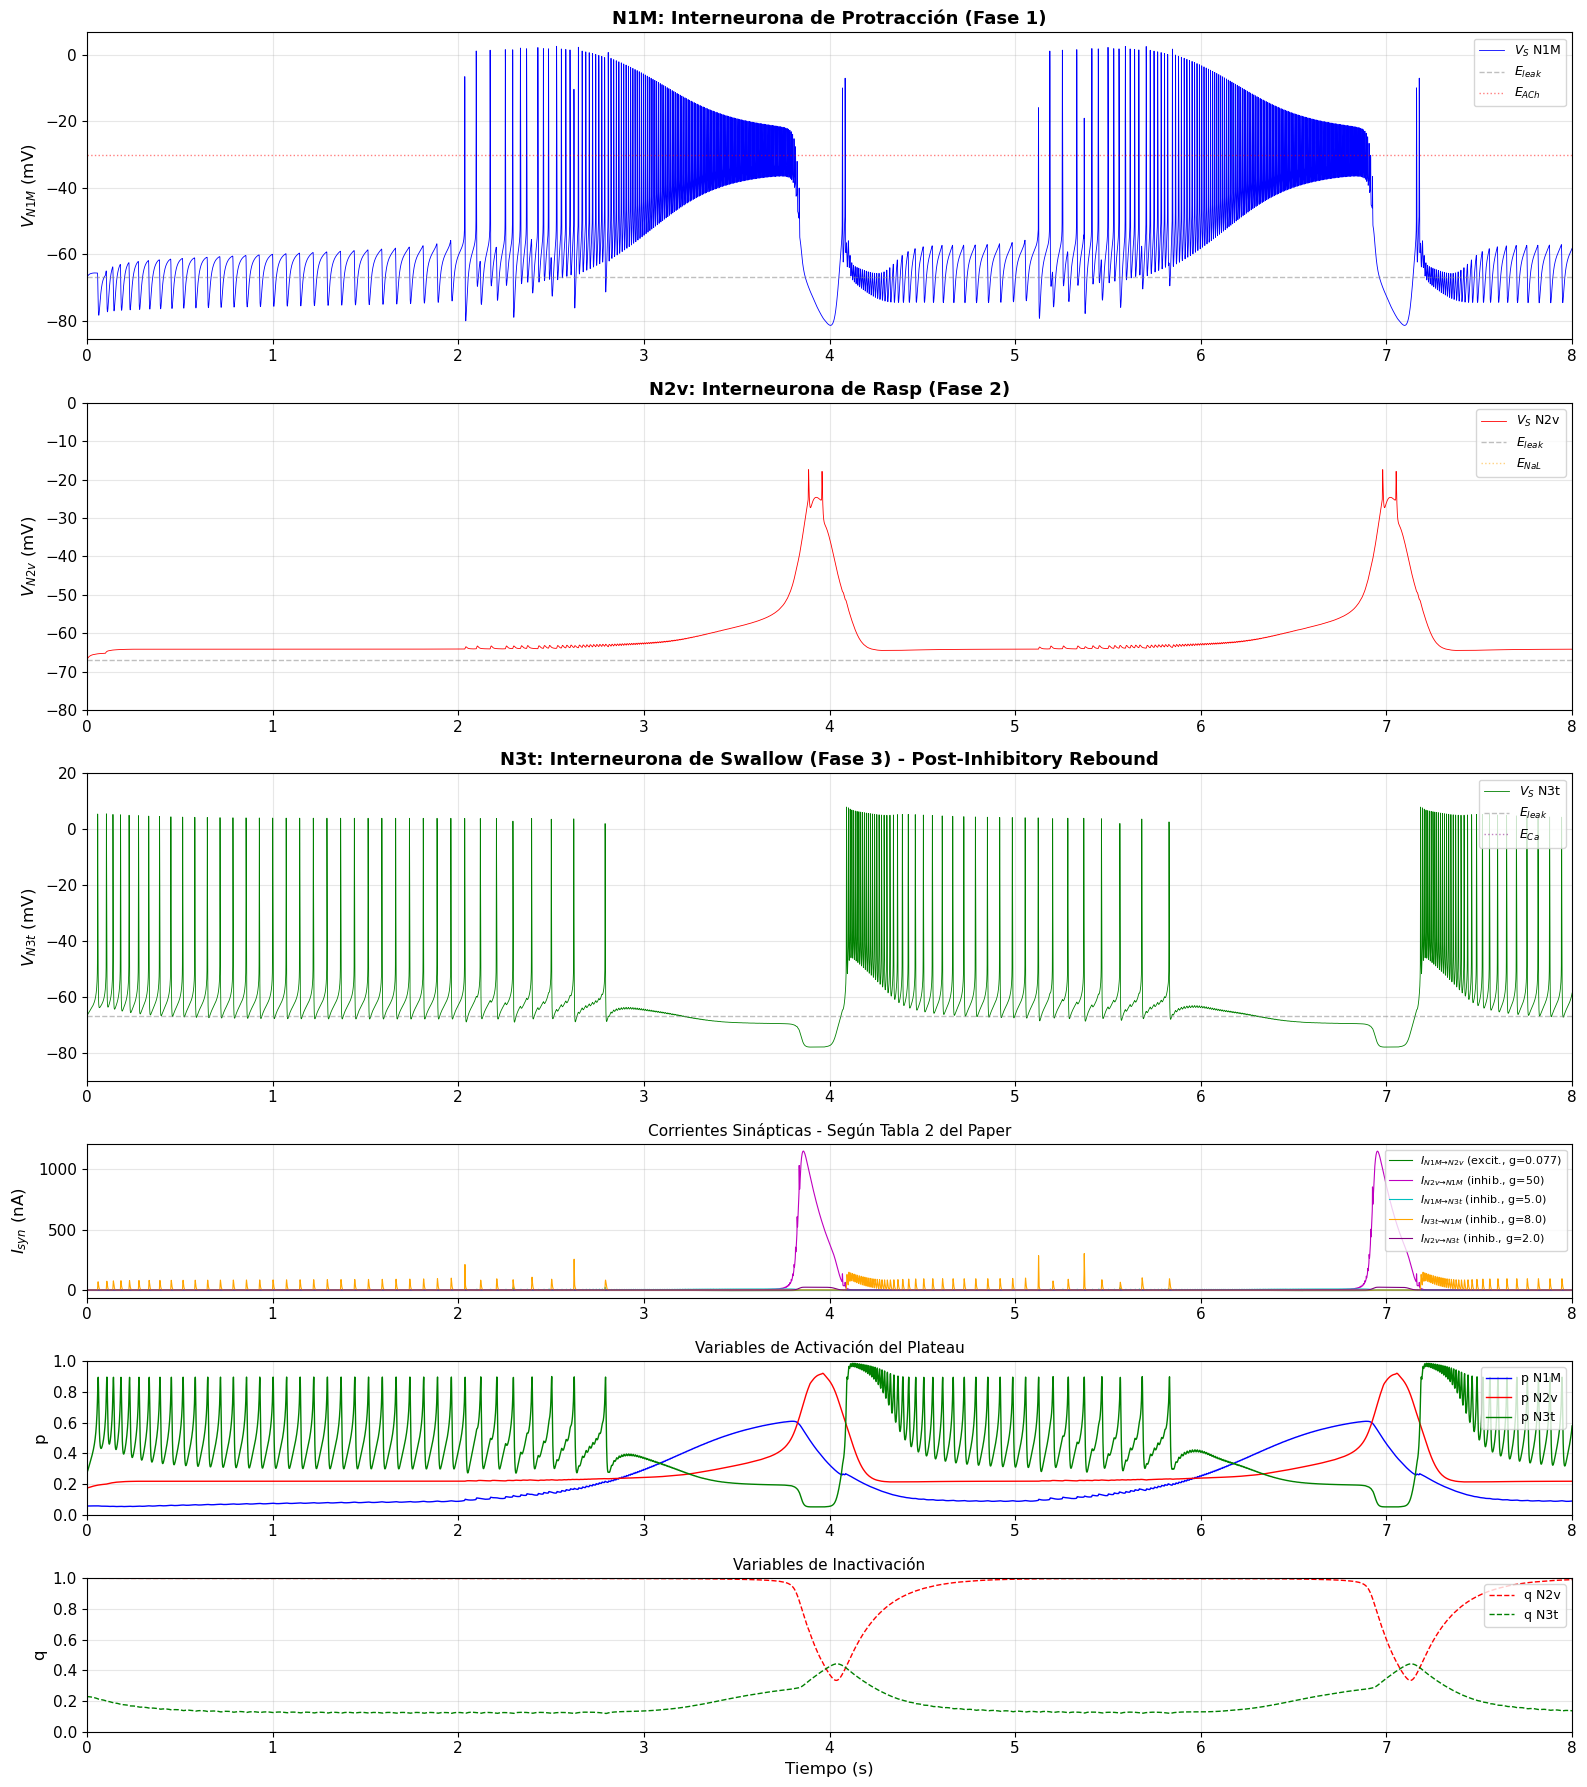

ESTADÍSTICAS DEL CIRCUITO TRIFÁSICO N1M <-> N2v <-> N3t

N1M soma - min: -81.47 mV, max: 2.59 mV
N2v soma - min: -67.00 mV, max: -17.38 mV
N3t soma - min: -78.03 mV, max: 7.98 mV


In [14]:
# Visualización del circuito trifásico N1M <-> N2v <-> N3t
# Mostramos los primeros 8 segundos para ver las oscilaciones trifásicas

t_max_plot_tri = 8000  # ms
mask_tri = t_tri <= t_max_plot_tri

fig, axes = plt.subplots(6, 1, figsize=(16, 18), gridspec_kw={'height_ratios': [2, 2, 2, 1, 1, 1]})

# Panel 1: Voltaje somático de N1M
ax1 = axes[0]
ax1.plot(t_tri[mask_tri]/1000, v_n1m_soma_tri[mask_tri], 'b-', linewidth=0.6, label='$V_S$ N1M')
ax1.set_ylabel('$V_{N1M}$ (mV)', fontsize=12)
ax1.set_title('N1M: Interneurona de Protracción (Fase 1)', fontsize=13, fontweight='bold')
ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
ax1.axhline(y=-30, color='red', linestyle=':', alpha=0.5, label='$E_{ACh}$')
ax1.legend(loc='upper right', fontsize=9)
ax1.set_xlim([0, t_max_plot_tri/1000])

# Panel 2: Voltaje somático de N2v
ax2 = axes[1]
ax2.plot(t_tri[mask_tri]/1000, v_n2v_soma_tri[mask_tri], 'r-', linewidth=0.6, label='$V_S$ N2v')
ax2.set_ylabel('$V_{N2v}$ (mV)', fontsize=12)
ax2.set_title('N2v: Interneurona de Rasp (Fase 2)', fontsize=13, fontweight='bold')
ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
ax2.axhline(y=55, color='orange', linestyle=':', alpha=0.5, label='$E_{NaL}$')
ax2.legend(loc='upper right', fontsize=9)
ax2.set_xlim([0, t_max_plot_tri/1000])
ax2.set_ylim([-80, 0])

# Panel 3: Voltaje somático de N3t
ax3 = axes[2]
ax3.plot(t_tri[mask_tri]/1000, v_n3t_soma_tri[mask_tri], 'g-', linewidth=0.6, label='$V_S$ N3t')
ax3.set_ylabel('$V_{N3t}$ (mV)', fontsize=12)
ax3.set_title('N3t: Interneurona de Swallow (Fase 3) - Post-Inhibitory Rebound', fontsize=13, fontweight='bold')
ax3.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label='$E_{leak}$')
ax3.axhline(y=80, color='purple', linestyle=':', alpha=0.5, label='$E_{Ca}$')
ax3.legend(loc='upper right', fontsize=9)
ax3.set_xlim([0, t_max_plot_tri/1000])
ax3.set_ylim([-90, 20])

# Panel 4: CORRIENTES SINÁPTICAS - Las 5 de la Tabla 2
ax4 = axes[3]
ax4.plot(t_tri[mask_tri]/1000, i_n1m_to_n2v_tri[mask_tri], 'g-', linewidth=0.8, label='$I_{N1M→N2v}$ (excit., g=0.077)')
ax4.plot(t_tri[mask_tri]/1000, i_n2v_to_n1m_tri[mask_tri], 'm-', linewidth=0.8, label='$I_{N2v→N1M}$ (inhib., g=50)')
ax4.plot(t_tri[mask_tri]/1000, i_n1m_to_n3t_tri[mask_tri], 'c-', linewidth=0.8, label='$I_{N1M→N3t}$ (inhib., g=5.0)')
ax4.plot(t_tri[mask_tri]/1000, i_n3t_to_n1m_tri[mask_tri], 'orange', linewidth=0.8, label='$I_{N3t→N1M}$ (inhib., g=8.0)')
ax4.plot(t_tri[mask_tri]/1000, i_n2v_to_n3t_tri[mask_tri], 'purple', linewidth=0.8, label='$I_{N2v→N3t}$ (inhib., g=2.0)')
ax4.set_ylabel('$I_{syn}$ (nA)', fontsize=12)
ax4.set_title('Corrientes Sinápticas - Según Tabla 2 del Paper', fontsize=11)
ax4.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax4.legend(loc='upper right', fontsize=8)
ax4.set_xlim([0, t_max_plot_tri/1000])

# Panel 5: Variables p de activación
ax5 = axes[4]
ax5.plot(t_tri[mask_tri]/1000, p_n1m_tri[mask_tri], 'b-', linewidth=1.0, label='p N1M')
ax5.plot(t_tri[mask_tri]/1000, p_n2v_tri[mask_tri], 'r-', linewidth=1.0, label='p N2v')
ax5.plot(t_tri[mask_tri]/1000, p_n3t_tri[mask_tri], 'g-', linewidth=1.0, label='p N3t')
ax5.set_ylabel('p', fontsize=12)
ax5.set_title('Variables de Activación del Plateau', fontsize=11)
ax5.legend(loc='upper right', fontsize=9)
ax5.set_xlim([0, t_max_plot_tri/1000])
ax5.set_ylim([0, 1])

# Panel 6: Variables q de inactivación
ax6 = axes[5]
ax6.plot(t_tri[mask_tri]/1000, q_n2v_tri[mask_tri], 'r--', linewidth=1.0, label='q N2v')
ax6.plot(t_tri[mask_tri]/1000, q_n3t_tri[mask_tri], 'g--', linewidth=1.0, label='q N3t')
ax6.set_xlabel('Tiempo (s)', fontsize=12)
ax6.set_ylabel('q', fontsize=12)
ax6.set_title('Variables de Inactivación', fontsize=11)
ax6.legend(loc='upper right', fontsize=9)
ax6.set_xlim([0, t_max_plot_tri/1000])
ax6.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('apuntes/imagenes/n1m_n2v_n3t_circuit.png', dpi=150, bbox_inches='tight')
plt.show()

# Estadísticas
print("ESTADÍSTICAS DEL CIRCUITO TRIFÁSICO N1M <-> N2v <-> N3t\n")
print(f"N1M soma - min: {v_n1m_soma_tri[mask_tri].min():.2f} mV, max: {v_n1m_soma_tri[mask_tri].max():.2f} mV")
print(f"N2v soma - min: {v_n2v_soma_tri[mask_tri].min():.2f} mV, max: {v_n2v_soma_tri[mask_tri].max():.2f} mV")
print(f"N3t soma - min: {v_n3t_soma_tri[mask_tri].min():.2f} mV, max: {v_n3t_soma_tri[mask_tri].max():.2f} mV")

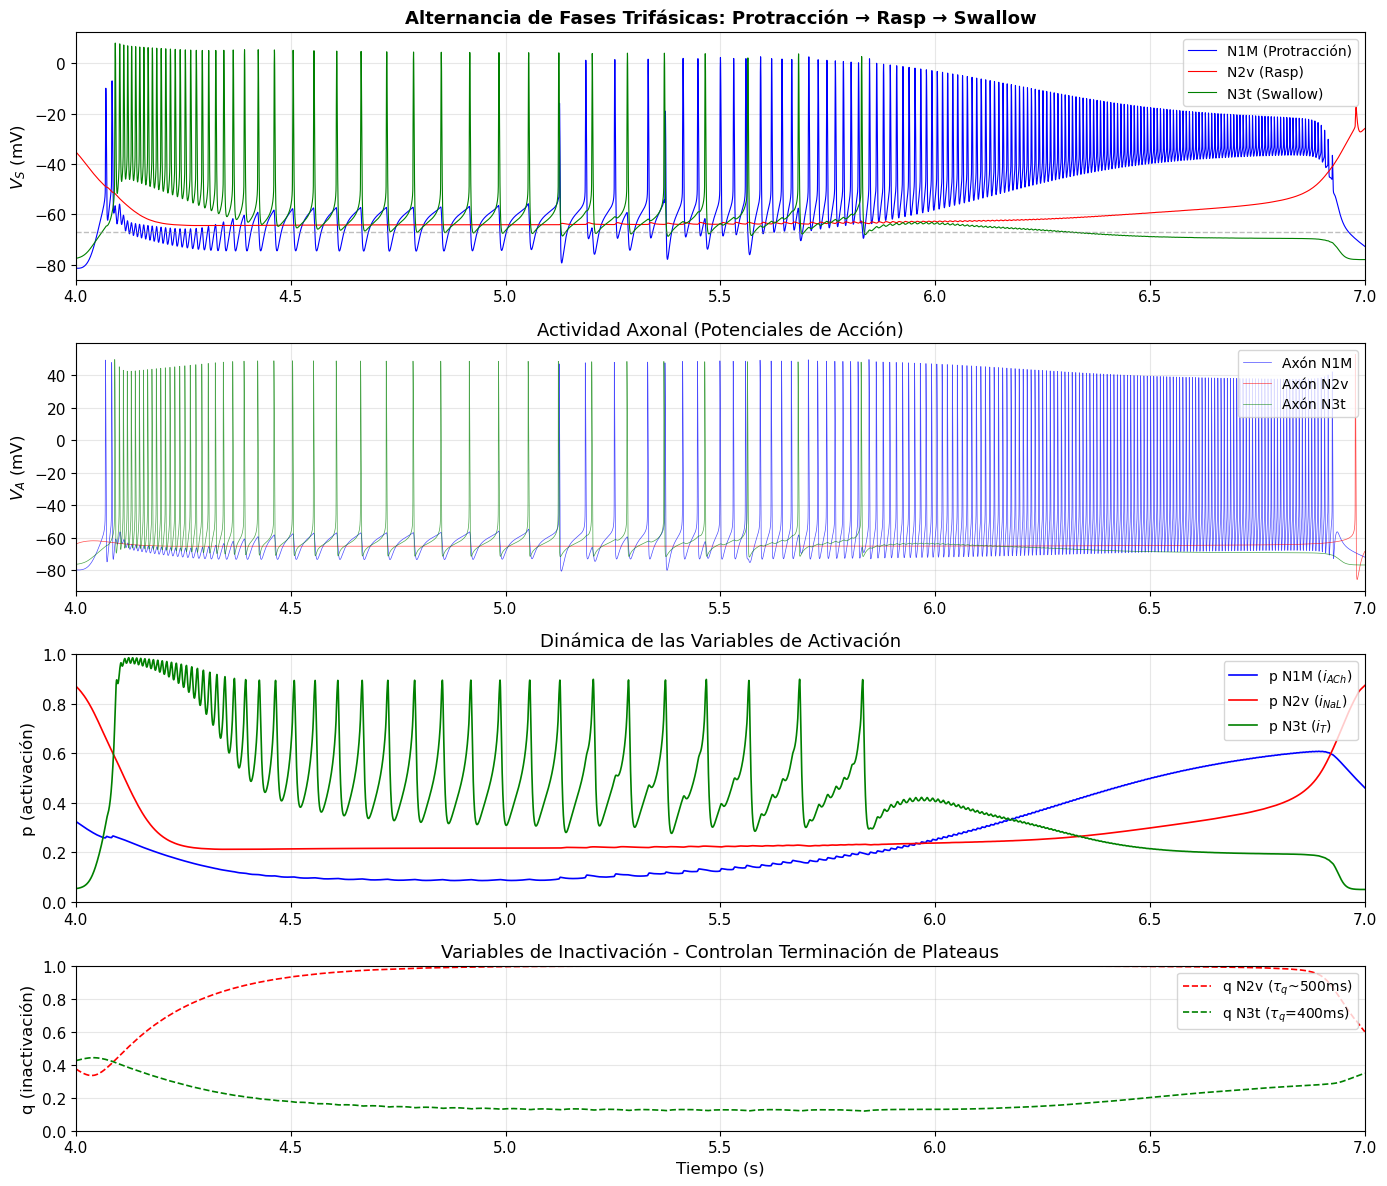

ANÁLISIS DEL RITMO TRIFÁSICO
Picos detectados en N1M: 97
Período medio del ciclo: 29.6 ms
Frecuencia: 33.742 Hz (2024.5 ciclos/min)


In [15]:
# Análisis detallado: Zoom en ciclos individuales del CPG trifásico
# Mostramos 3 segundos en el régimen estacionario para ver la estructura del ritmo

t_start_zoom_tri = 4000  # ms - después del transitorio inicial
t_end_zoom_tri = 7000    # ms
mask_zoom_tri = (t_tri >= t_start_zoom_tri) & (t_tri <= t_end_zoom_tri)

fig, axes = plt.subplots(4, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [1.5, 1.5, 1.5, 1]})

# Panel 1: Comparación de voltajes somáticos - las 3 neuronas
ax1 = axes[0]
ax1.plot(t_tri[mask_zoom_tri]/1000, v_n1m_soma_tri[mask_zoom_tri], 'b-', linewidth=0.8, label='N1M (Protracción)')
ax1.plot(t_tri[mask_zoom_tri]/1000, v_n2v_soma_tri[mask_zoom_tri], 'r-', linewidth=0.8, label='N2v (Rasp)')
ax1.plot(t_tri[mask_zoom_tri]/1000, v_n3t_soma_tri[mask_zoom_tri], 'g-', linewidth=0.8, label='N3t (Swallow)')
ax1.set_ylabel('$V_S$ (mV)', fontsize=12)
ax1.set_title('Alternancia de Fases Trifásicas: Protracción → Rasp → Swallow', fontsize=13, fontweight='bold')
ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim([t_start_zoom_tri/1000, t_end_zoom_tri/1000])

# Panel 2: Voltajes axonales (spikes) de las 3 neuronas
ax2 = axes[1]
ax2.plot(t_tri[mask_zoom_tri]/1000, v_n1m_axon_tri[mask_zoom_tri], 'b-', linewidth=0.5, alpha=0.7, label='Axón N1M')
ax2.plot(t_tri[mask_zoom_tri]/1000, v_n2v_axon_tri[mask_zoom_tri], 'r-', linewidth=0.5, alpha=0.7, label='Axón N2v')
ax2.plot(t_tri[mask_zoom_tri]/1000, v_n3t_axon_tri[mask_zoom_tri], 'g-', linewidth=0.5, alpha=0.7, label='Axón N3t')
ax2.set_ylabel('$V_A$ (mV)', fontsize=12)
ax2.set_title('Actividad Axonal (Potenciales de Acción)', fontsize=13)
ax2.legend(loc='upper right', fontsize=10)
ax2.set_xlim([t_start_zoom_tri/1000, t_end_zoom_tri/1000])

# Panel 3: Variables p de compuerta
ax3 = axes[2]
ax3.plot(t_tri[mask_zoom_tri]/1000, p_n1m_tri[mask_zoom_tri], 'b-', linewidth=1.2, label='p N1M ($i_{ACh}$)')
ax3.plot(t_tri[mask_zoom_tri]/1000, p_n2v_tri[mask_zoom_tri], 'r-', linewidth=1.2, label='p N2v ($i_{NaL}$)')
ax3.plot(t_tri[mask_zoom_tri]/1000, p_n3t_tri[mask_zoom_tri], 'g-', linewidth=1.2, label='p N3t ($i_T$)')
ax3.set_ylabel('p (activación)', fontsize=12)
ax3.set_title('Dinámica de las Variables de Activación', fontsize=13)
ax3.legend(loc='upper right', fontsize=10)
ax3.set_xlim([t_start_zoom_tri/1000, t_end_zoom_tri/1000])
ax3.set_ylim([0, 1])

# Panel 4: Variables q de inactivación (solo N2v y N3t)
ax4 = axes[3]
ax4.plot(t_tri[mask_zoom_tri]/1000, q_n2v_tri[mask_zoom_tri], 'r--', linewidth=1.2, label='q N2v ($\\tau_q$~500ms)')
ax4.plot(t_tri[mask_zoom_tri]/1000, q_n3t_tri[mask_zoom_tri], 'g--', linewidth=1.2, label='q N3t ($\\tau_q$=400ms)')
ax4.set_xlabel('Tiempo (s)', fontsize=12)
ax4.set_ylabel('q (inactivación)', fontsize=12)
ax4.set_title('Variables de Inactivación - Controlan Terminación de Plateaus', fontsize=13)
ax4.legend(loc='upper right', fontsize=10)
ax4.set_xlim([t_start_zoom_tri/1000, t_end_zoom_tri/1000])
ax4.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('apuntes/imagenes/n1m_n2v_n3t_zoom.png', dpi=150, bbox_inches='tight')
plt.show()

# Análisis de frecuencia del ritmo trifásico
from scipy.signal import find_peaks

# Buscar picos en el voltaje somático de N1M para calcular período del ciclo completo
peaks_n1m_tri, _ = find_peaks(v_n1m_soma_tri[mask_zoom_tri], height=-50, distance=1000)
peaks_n3t_tri, _ = find_peaks(v_n3t_soma_tri[mask_zoom_tri], height=-60, distance=1000)

print("ANÁLISIS DEL RITMO TRIFÁSICO")

periodos_n1m_tri = np.diff(t_tri[mask_zoom_tri][peaks_n1m_tri])
periodo_medio_tri = np.mean(periodos_n1m_tri)
frecuencia_tri = 1000 / periodo_medio_tri  # Hz
print(f"Picos detectados en N1M: {len(peaks_n1m_tri)}")
print(f"Período medio del ciclo: {periodo_medio_tri:.1f} ms")
print(f"Frecuencia: {frecuencia_tri:.3f} Hz ({frecuencia_tri*60:.1f} ciclos/min)")

## Análisis del Circuito Trifásico N1M ↔ N2v ↔ N3t

### Mecanismo de Generación del Ritmo Trifásico

El CPG de alimentación de *Lymnaea stagnalis* genera un ritmo trifásico mediante la interacción de tres interneuronas con propiedades intrínsecas diferentes:

#### Secuencia del Ciclo de Alimentación

| Fase | Neurona | Corriente | Acción | Duración aprox. |
|------|---------|-----------|--------|-----------------|
| **1. Protracción** | N1M | $i_{ACh}$ | Apertura rádula | ~300-500 ms |
| **2. Rasp** | N2v | $i_{NaL}$ | Raspado | ~400-600 ms |
| **3. Swallow** | N3t | $i_T$ | Deglución | ~200-400 ms |

#### Rol de Cada Neurona

1. **N1M (Protracción)**:
   - Inicia el ciclo con su plateau de $i_{ACh}$ ($\tau_p = 250$ ms)
   - **Excita** a N2v para preparar la fase de rasp
   - **Inhibe** a N3t para evitar swallow prematuro

2. **N2v (Rasp)**:
   - Se activa por la excitación de N1M
   - Su $i_{NaL}$ genera un plateau sostenido
   - **Inhibe fuertemente** a N1M ($g_{syn}=50.0$), terminando la protracción
   - **Inhibe** a N3t ($g_{syn}=2.0$) para evitar swallow durante rasp
   - La inactivación lenta ($\tau_q \approx 500$ ms) termina su plateau

3. **N3t (Swallow)**:
   - Permanece inhibida durante protracción (por N1M) y rasp (por N2v)
   - Cuando termina la inhibición, genera **post-inhibitory rebound (PIR)**
   - Su corriente T de bajo umbral ($i_T$) permite activación desde hiperpolarización
   - **Inhibe** a N1M ($g_{syn}=8.0$), completando el ciclo y permitiendo el reinicio

#### Importancia del Post-Inhibitory Rebound

El PIR de N3t es esencial para el ritmo trifásico:

$$i_T = 3.27 \cdot p^3 \cdot q \cdot (V_S - 80)$$

- $\tau_p = 4$ ms: Activación muy rápida
- $\tau_q = 400$ ms: Inactivación lenta

La hiperpolarización durante las fases de protracción y rasp **des-inactiva** la corriente T (q → 1), permitiendo un rebote cuando la inhibición termina.

### Comparación con la Figura 4B del Paper

En Vavoulis et al. (2007), la Figura 4B muestra:
- Alternancia trifásica clara: N1M → N2v → N3t → N1M...
- Período del ritmo ~1-2 segundos
- N3t activo tras la terminación de N2v (PIR)
- Ciclo de alimentación completo: protracción → rasp → swallow

## 4.C CPG Completo con SO: Red de Alimentación Completa (Figura 4C)

### El Slow Oscillator (SO): Controlador de Frecuencia

El **SO (Slow Oscillator)** es una interneurona moduladora única en el sistema nervioso de *Lymnaea*:

- **Propiedades intrínsecas**: Es una neurona **PASIVA** (n_type = 0), sin corrientes intrínsecas especiales
- Solo contiene corriente de fuga: $i_X = 0$
- Dispara **tónicamente** en respuesta a corriente inyectada
- Su **frecuencia de disparo** determina la frecuencia del CPG

### Rol Funcional del SO

> *"The extrinsic slow oscillator (SO) interneuron controls the frequency of the feeding rhythm"*
> — Vavoulis et al. (2007)

| Propiedad | Ritmo N1M-driven | Ritmo SO-driven |
|-----------|------------------|-----------------|
| Período mínimo | ~6 segundos | ~3 segundos |
| Frecuencia máx. | ~0.17 Hz | ~0.33 Hz |
| Fase P afectada | No | **Sí** |
| Fase S afectada | **Sí** | **Sí** |


### Sinapsis de la Red Completa (Tabla 2)

**CPG Trifásico (5 sinapsis):**
| Presináptica | Postsináptica | Tipo | g_syn | E_syn (mV) | τ (ms) |
|--------------|---------------|------|-------|------------|--------|
| N1M | N2v | Excitadora | 0.077 | 0 | 200 |
| N2v | N1M | Inhibidora | 50.0 | -90 | 50 |
| N1M | N3t | Inhibidora | 5.0 | -90 | 50 |
| N3t | N1M | Inhibidora | 8.0 | -90 | 50 |
| N2v | N3t | Inhibidora | 2.0 | -90 | 50 |

**Sinapsis con SO (3 sinapsis):**
| Presináptica | Postsináptica | Tipo | g_syn | E_syn (mV) | τ (ms) |
|--------------|---------------|------|-------|------------|--------|
| N2v | SO | Inhibidora | 8.0 | -90 | 50 |
| SO | N1M | Excitadora | 4.0 | 0 | 200 |
| SO | N2v | Excitadora | 1.0 | 0 | 200 |

### Mecanismo de Control de Frecuencia

1. **SO activa a N1M y N2v** mediante sinapsis excitadoras lentas (τ=200ms)
2. **SO→N2v acelera la activación del plateau N2v**, acortando la fase P
3. **N2v→SO inhibe al SO** durante la fase R, creando retroalimentación
4. Al recuperarse de la inhibición, SO **reinicia el ciclo** excitando N1M

In [16]:
import subprocess
import numpy as np
import os

print("Compilando CPG completo (SO-driven)...")
result = subprocess.run(['make', '-j4', 'CPG'], cwd=BUILD_DIR, capture_output=True, text=True)
if result.returncode != 0:
    print("Error de compilación:")
    print(result.stderr)
else:
    print("Compilación exitosa.")

# Ejecutar simulación (ejecutable en BUILD_DIR_CIRCUITOS/CPG)
print("Ejecutando simulación del CPG completo SO-driven...")
cpg_executable = os.path.join(BUILD_DIR_CIRCUITOS, 'CPG')
result = subprocess.run([cpg_executable], capture_output=True, text=True, cwd=BUILD_DIR_CIRCUITOS)

# Verificar que hay salida
if not result.stdout.strip():
    print("Error: No se obtuvo salida de la simulación")
    print(f"stderr: {result.stderr}")
else:
    # Procesar datos (23 columnas)
    data_cpg = np.array([list(map(float, line.split())) for line in result.stdout.strip().split('\n')])

    # Extraer variables
    t_cpg = data_cpg[:, 0]  # tiempo (ms)

    # Voltajes (8 columnas)
    v_n1m_soma_cpg = data_cpg[:, 1]
    v_n1m_axon_cpg = data_cpg[:, 2]
    v_n2v_soma_cpg = data_cpg[:, 3]
    v_n2v_axon_cpg = data_cpg[:, 4]
    v_n3t_soma_cpg = data_cpg[:, 5]
    v_n3t_axon_cpg = data_cpg[:, 6]
    v_so_soma_cpg = data_cpg[:, 7]
    v_so_axon_cpg = data_cpg[:, 8]

    # Corrientes sinápticas (8 columnas)
    i_n1m_n2v_cpg = data_cpg[:, 9]    # N1M→N2v (excit., g=0.077)
    i_n2v_n1m_cpg = data_cpg[:, 10]   # N2v→N1M (inhib., g=50.0)
    i_n1m_n3t_cpg = data_cpg[:, 11]   # N1M→N3t (inhib., g=5.0)
    i_n3t_n1m_cpg = data_cpg[:, 12]   # N3t→N1M (inhib., g=8.0)
    i_n2v_n3t_cpg = data_cpg[:, 13]   # N2v→N3t (inhib., g=2.0)
    i_n2v_so_cpg = data_cpg[:, 14]    # N2v→SO (inhib., g=8.0)
    i_so_n1m_cpg = data_cpg[:, 15]    # SO→N1M (excit., g=4.0)
    i_so_n2v_cpg = data_cpg[:, 16]    # SO→N2v (excit., g=1.0)

    # Variables de gating (6 columnas)
    p_n1m_cpg = data_cpg[:, 17]
    p_n2v_cpg = data_cpg[:, 18]
    q_n2v_cpg = data_cpg[:, 19]
    p_n3t_cpg = data_cpg[:, 20]
    q_n3t_cpg = data_cpg[:, 21]
    p_so_cpg = data_cpg[:, 22]

    print(f"Simulación completada: {len(t_cpg)} puntos, {t_cpg[-1]/1000:.1f} segundos")
    print(f"Formato de datos: {data_cpg.shape[1]} columnas (4 neuronas, 8 sinapsis)")

Compilando CPG completo (SO-driven)...
Compilación exitosa.
Ejecutando simulación del CPG completo SO-driven...
Simulación completada: 1000000 puntos, 10.0 segundos
Formato de datos: 23 columnas (4 neuronas, 8 sinapsis)


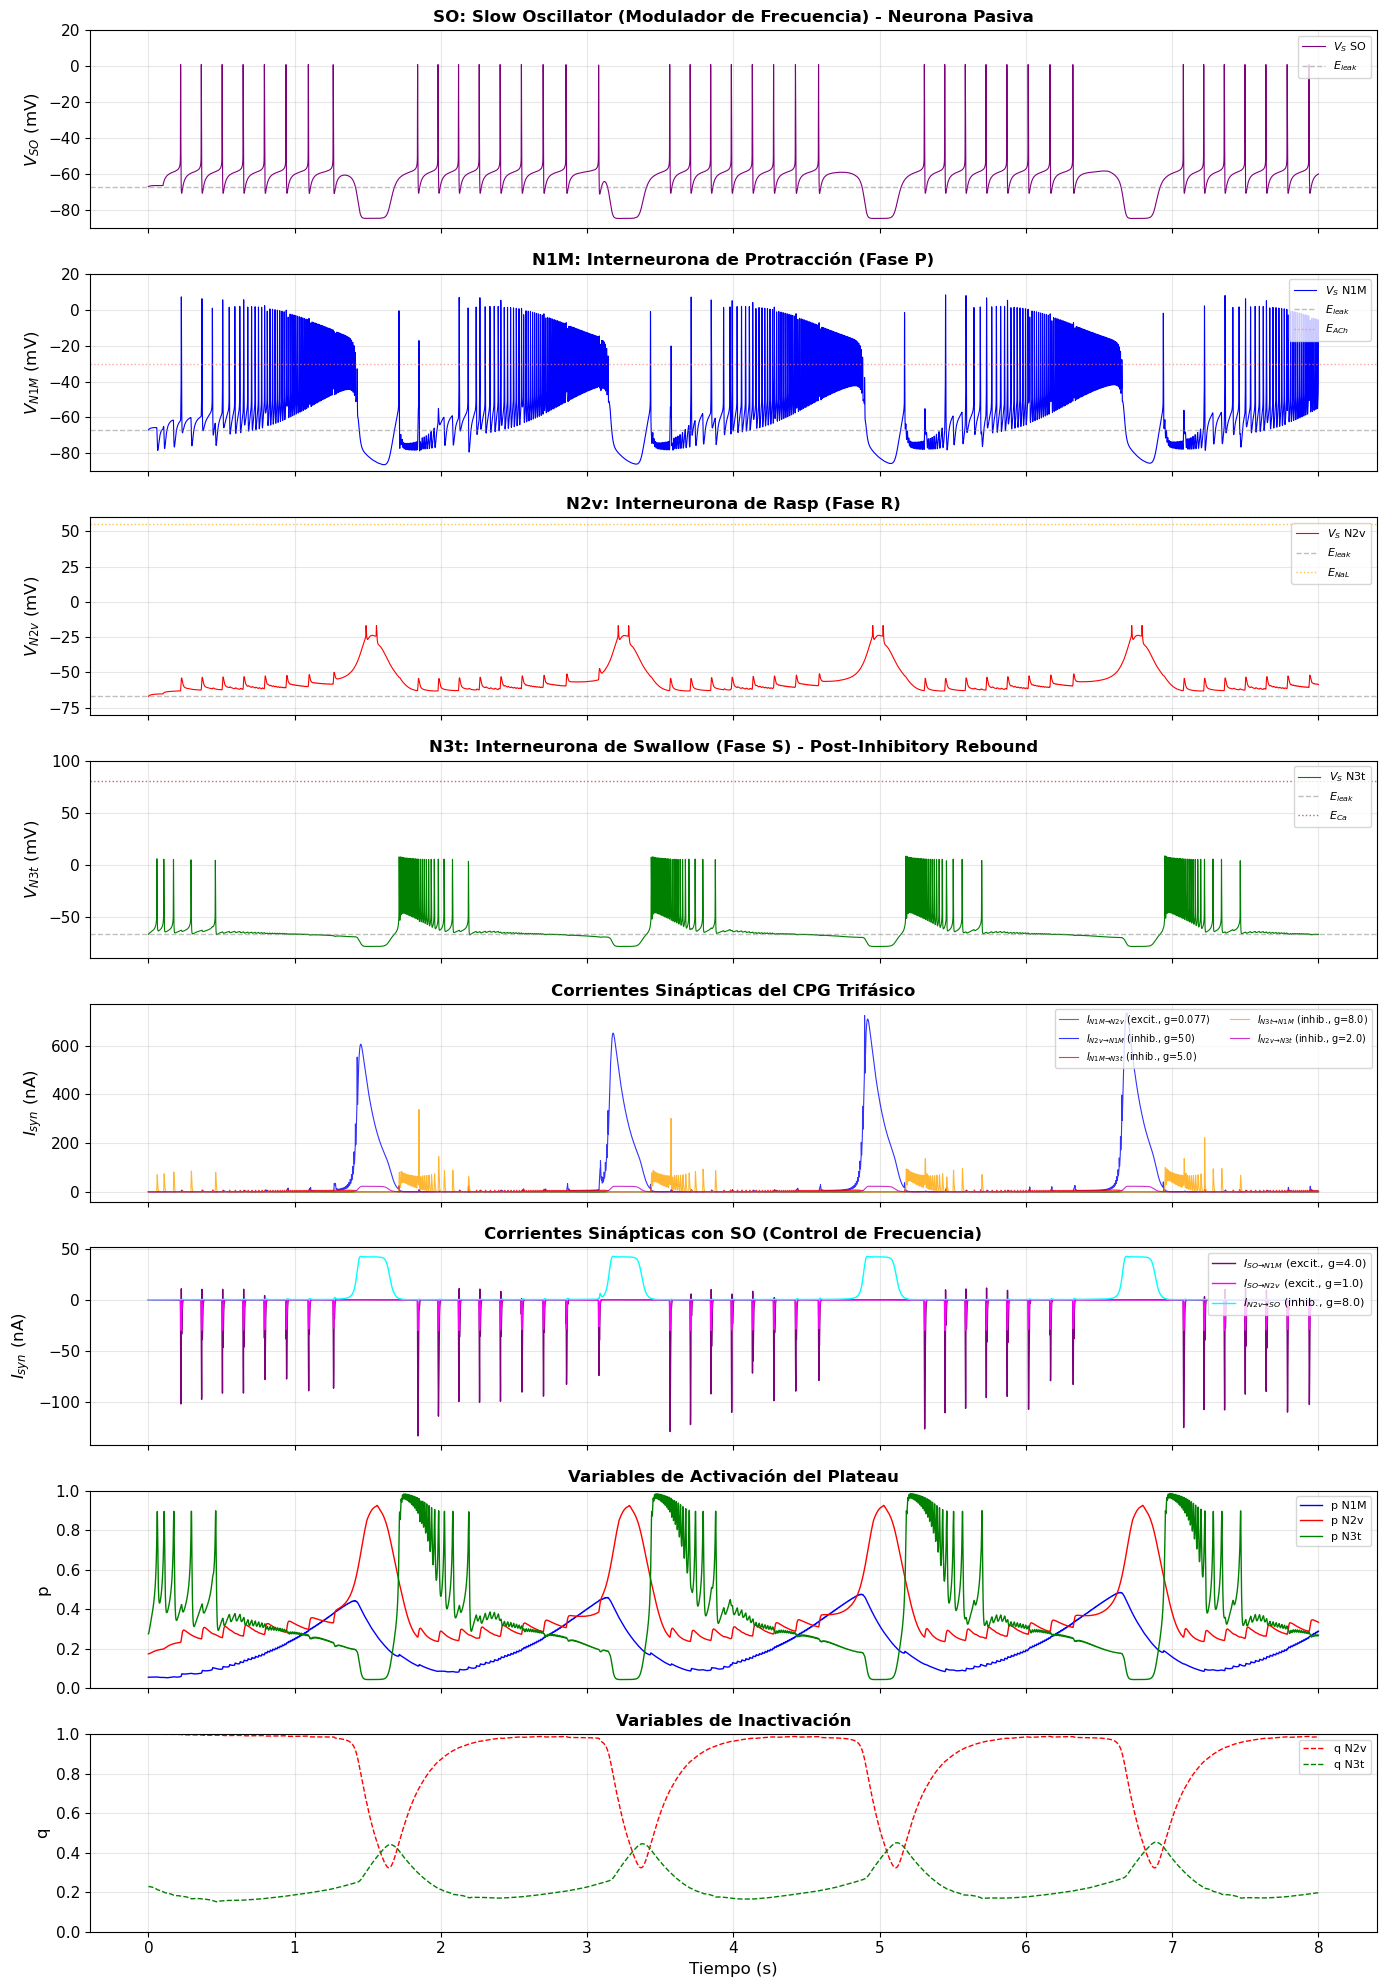


Rangos de voltaje:
  SO soma: -84.74 a 0.93 mV
  N1M soma: -86.32 a 8.22 mV
  N2v soma: -67.00 a -16.76 mV
  N3t soma: -78.81 a 8.37 mV


In [17]:
# Visualización del CPG Completo SO-driven (Figura 4C del paper)
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parámetros de visualización
t_max_plot_cpg = 8000  # 8 segundos
mask_cpg = (t_cpg >= 0) & (t_cpg <= t_max_plot_cpg)

fig, axes = plt.subplots(8, 1, figsize=(14, 20), sharex=True)

# 1. SO (Modulador de Frecuencia)
ax1 = axes[0]
ax1.plot(t_cpg[mask_cpg]/1000, v_so_soma_cpg[mask_cpg], 'purple', linewidth=0.8, label=r'$V_S$ SO')
ax1.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label=r'$E_{leak}$')
ax1.set_ylabel(r'$V_{SO}$ (mV)')
ax1.set_title('SO: Slow Oscillator (Modulador de Frecuencia) - Neurona Pasiva', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', fontsize=8)
ax1.set_ylim([-90, 20])

# 2. N1M (Fase 1 - Protracción)
ax2 = axes[1]
ax2.plot(t_cpg[mask_cpg]/1000, v_n1m_soma_cpg[mask_cpg], 'b', linewidth=0.8, label=r'$V_S$ N1M')
ax2.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label=r'$E_{leak}$')
ax2.axhline(y=-30, color='salmon', linestyle=':', alpha=0.7, label=r'$E_{ACh}$')
ax2.set_ylabel(r'$V_{N1M}$ (mV)')
ax2.set_title('N1M: Interneurona de Protracción (Fase P)', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=8)
ax2.set_ylim([-90, 20])

# 3. N2v (Fase 2 - Rasp)
ax3 = axes[2]
ax3.plot(t_cpg[mask_cpg]/1000, v_n2v_soma_cpg[mask_cpg], 'r', linewidth=0.8, label=r'$V_S$ N2v')
ax3.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label=r'$E_{leak}$')
ax3.axhline(y=55, color='orange', linestyle=':', alpha=0.7, label=r'$E_{NaL}$')
ax3.set_ylabel(r'$V_{N2v}$ (mV)')
ax3.set_title('N2v: Interneurona de Rasp (Fase R)', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right', fontsize=8)
ax3.set_ylim([-80, 60])

# 4. N3t (Fase 3 - Swallow)
ax4 = axes[3]
ax4.plot(t_cpg[mask_cpg]/1000, v_n3t_soma_cpg[mask_cpg], 'g', linewidth=0.8, label=r'$V_S$ N3t')
ax4.axhline(y=-67, color='gray', linestyle='--', alpha=0.5, label=r'$E_{leak}$')
ax4.axhline(y=80, color='brown', linestyle=':', alpha=0.7, label=r'$E_{Ca}$')
ax4.set_ylabel(r'$V_{N3t}$ (mV)')
ax4.set_title('N3t: Interneurona de Swallow (Fase S) - Post-Inhibitory Rebound', fontsize=12, fontweight='bold')
ax4.legend(loc='upper right', fontsize=8)
ax4.set_ylim([-90, 100])

# 5. Corrientes sinápticas del CPG
ax5 = axes[4]
ax5.plot(t_cpg[mask_cpg]/1000, i_n1m_n2v_cpg[mask_cpg], 'g', linewidth=0.8, alpha=0.8, label=r'$I_{N1M→N2v}$ (excit., g=0.077)')
ax5.plot(t_cpg[mask_cpg]/1000, i_n2v_n1m_cpg[mask_cpg], 'b', linewidth=0.8, alpha=0.8, label=r'$I_{N2v→N1M}$ (inhib., g=50)')
ax5.plot(t_cpg[mask_cpg]/1000, i_n1m_n3t_cpg[mask_cpg], 'r', linewidth=0.8, alpha=0.8, label=r'$I_{N1M→N3t}$ (inhib., g=5.0)')
ax5.plot(t_cpg[mask_cpg]/1000, i_n3t_n1m_cpg[mask_cpg], 'orange', linewidth=0.8, alpha=0.8, label=r'$I_{N3t→N1M}$ (inhib., g=8.0)')
ax5.plot(t_cpg[mask_cpg]/1000, i_n2v_n3t_cpg[mask_cpg], 'm', linewidth=0.8, alpha=0.8, label=r'$I_{N2v→N3t}$ (inhib., g=2.0)')
ax5.set_ylabel(r'$I_{syn}$ (nA)')
ax5.set_title('Corrientes Sinápticas del CPG Trifásico', fontsize=12, fontweight='bold')
ax5.legend(loc='upper right', fontsize=7, ncol=2)

# 6. Corrientes sinápticas con SO
ax6 = axes[5]
ax6.plot(t_cpg[mask_cpg]/1000, i_so_n1m_cpg[mask_cpg], 'purple', linewidth=1.0, label=r'$I_{SO→N1M}$ (excit., g=4.0)')
ax6.plot(t_cpg[mask_cpg]/1000, i_so_n2v_cpg[mask_cpg], 'magenta', linewidth=1.0, label=r'$I_{SO→N2v}$ (excit., g=1.0)')
ax6.plot(t_cpg[mask_cpg]/1000, i_n2v_so_cpg[mask_cpg], 'cyan', linewidth=1.0, label=r'$I_{N2v→SO}$ (inhib., g=8.0)')
ax6.set_ylabel(r'$I_{syn}$ (nA)')
ax6.set_title('Corrientes Sinápticas con SO (Control de Frecuencia)', fontsize=12, fontweight='bold')
ax6.legend(loc='upper right', fontsize=8)

# 7. Variables de activación del plateau
ax7 = axes[6]
ax7.plot(t_cpg[mask_cpg]/1000, p_n1m_cpg[mask_cpg], 'b', linewidth=1.0, label='p N1M')
ax7.plot(t_cpg[mask_cpg]/1000, p_n2v_cpg[mask_cpg], 'r', linewidth=1.0, label='p N2v')
ax7.plot(t_cpg[mask_cpg]/1000, p_n3t_cpg[mask_cpg], 'g', linewidth=1.0, label='p N3t')
ax7.set_ylabel('p')
ax7.set_title('Variables de Activación del Plateau', fontsize=12, fontweight='bold')
ax7.legend(loc='upper right', fontsize=8)
ax7.set_ylim([0, 1])

# 8. Variables de inactivación
ax8 = axes[7]
ax8.plot(t_cpg[mask_cpg]/1000, q_n2v_cpg[mask_cpg], 'r--', linewidth=1.0, label='q N2v')
ax8.plot(t_cpg[mask_cpg]/1000, q_n3t_cpg[mask_cpg], 'g--', linewidth=1.0, label='q N3t')
ax8.set_ylabel('q')
ax8.set_xlabel('Tiempo (s)')
ax8.set_title('Variables de Inactivación', fontsize=12, fontweight='bold')
ax8.legend(loc='upper right', fontsize=8)
ax8.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('cpg_completo_so_driven.png', dpi=150, bbox_inches='tight')
plt.show()


print(f"\nRangos de voltaje:")
print(f"  SO soma: {v_so_soma_cpg.min():.2f} a {v_so_soma_cpg.max():.2f} mV")
print(f"  N1M soma: {v_n1m_soma_cpg.min():.2f} a {v_n1m_soma_cpg.max():.2f} mV")
print(f"  N2v soma: {v_n2v_soma_cpg.min():.2f} a {v_n2v_soma_cpg.max():.2f} mV")
print(f"  N3t soma: {v_n3t_soma_cpg.min():.2f} a {v_n3t_soma_cpg.max():.2f} mV")